<a href="https://colab.research.google.com/github/moadahir/ML-Projects/blob/main/Group2_AttritionModel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING EMPLOYEE ATTRITION**

We analyse the IBM HR Employee Attrition dataset to identify key factors  influencing employee turnover and to build a classification model that predicts attrition. This dataset is appropriate for our objectives due to its manageable size (1,470 records), diverse feature set, and strong relevance to real-world HR analytics. However, challenges such as potential missing values, irrelevant features, and class imbalance must be considered, as these issues can affect model performance and require careful preprocessing.

In this analysis, we focus on understanding which factors most strongly influence employee attrition and how these relationships can be used to build an effective predictive model.

We will explore questions such as: Does working overtime increase the likelihood of attrition? Do job satisfaction and work life balance influence an employee’s decision to leave? Does a lack of recent promotion contribute to higher turnover?

From these questions, we form hypotheses—for example, that employees working overtime or experiencing low satisfaction levels have higher attrition risk, and that a lack of recent promotion contributes to turnover. These hypotheses will guide our exploratory data analysis and modelling, helping us identify meaningful patterns and evaluate their predictive value in the final machine learning model.

 # **Section 1: Import Libraries and Dataset**

##**1.1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, make_scorer, f1_score, precision_score, recall_score
import warnings  # stop the warnings
warnings.filterwarnings('ignore')

##**1.2. Load Dataset**

In [ ]:
df = pd.read_csv("IBM_employee_attrition_eng.csv")

 # **Section 2: Exploratory Data Analysis (Sara Algarmouzi)**

In order to comprehend the structure of dataset and identify the patterns that influence our modelling choices, we examine it in this section, summary statistics, determine variable types, examine the fundamental structure of the data, and search for common problems like missing values, inconsistent formats, or odd ranges.  Additionally, we look at early correlations between important characteristics and the target variable, attrition, to determine what factors might cause employees to leave the company.  At each step, we make an initial assumption based on domain intuition and use code to either validate or challenge it.

##**2.1. Basic Structure of Dataset**

we look at a few rows of the dataset using df.head() to quickly check that the data loaded correctly

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0.0,8,0.0,1,6,4,0.0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1.0,10,3.0,3,10,7,1.0,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0.0,7,3.0,3,0,0,0.0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0.0,8,3.0,3,8,7,3.0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1.0,6,3.0,3,2,2,2.0,2


from the output we see a typical employee record with features such as age, icome, job role, and satisfaction scores confirming that the dataset matches our expectations and that each row represents a single employee

we check the shape of the dataset using df.shape because we need to know how many rows and columns we are working with and helps judge whether the dataset is large enough and how complex the model might be

In [ ]:
df.shape

(1470, 35)

output gives shows total no. of rows and columns confirming that we have a reasonably sized dataset with many features

here we calculate summary statistics for the numerical variables using df.describe to help understand typical values,spread, and possible outliers acroos features like age or monthyly income

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


we see minimum, maximum, mean and standdard deviation for each numrical. Age: mean ≈ 36.9, min 18, max 60,MonthlyIncome is mean ≈ 6500, min 1009, max 19999, totalWorkingYear mean ≈ 11, min 0, max 40. the wide range. the wide range in monthly income and total working years justifies using boxplots later to check outliers, the age spread of 18-60 supports using histograms and violin plots explore workforce demographics and features like yearsatCompany and NumCompaniesWorked show large variance.


we examine column data types to understand how each feature should be treated during visualisation and preprocessing.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


the output of df.types shows most features are stored at intgers and floats numerical features with several columns being categorical appear as object types and Ordinal features are stored as integers but actually represent categorical scales.

this means objects type variables will influence the choice of plots we can use countplots and barcharts for the categorical distributions and ordinal numerical features.

we seperate numerical and categorical variables because different EDA visualisations and processing steps apply to each type

identify categorical and numerical columns seperately.

In [ ]:
df.select_dtypes(include=["int", "float"]).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.select_dtypes(exclude=["int", "float"]).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [ ]:
df.select_dtypes(exclude=["object"]).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

##**2.2. Missing Values and Duplicates**

Here we check for missing values because missing data can affect later modelling.

In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


results show non null entries for most columns but missing values detected in three features which are StockOptionLevel TrainingTimesLastYear and YearsSinceLastPromotion

the dataset is largely complete but three variables containing missing values either incomplete employee records or unrecorded values requires attention in processing.

In [ ]:
df.duplicated().sum()

np.int64(0)

0 no duplicated vlaues in the dataset

##**2.3. Distribution Analysis**

**Visualisation plot of the distribution of the Age (fundmentally continous numerical), Monthly Income (continous numerical) and Total Working Years (continous numerical)  using histograms**

we examine the distribution of Age to understand the workforce's age profile,detect skewness, and identify outliers. age is often linked to turover behaviour



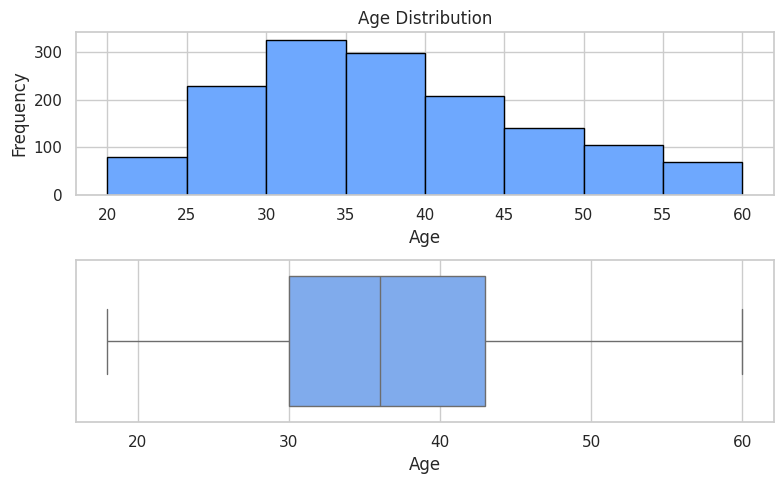

In [ ]:
# AGE: histogram + boxplot to see spread + outliers
bins_age = [20, 25, 30, 35, 40, 45, 50, 55, 60]

plt.figure(figsize=(8, 5))

# top: histogram
plt.subplot(2, 1, 1)
plt.hist(df["Age"], bins=bins_age, edgecolor="black", color="#6EA8FE")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")

# bottom: boxplot for outliers
plt.subplot(2, 1, 2)
sns.boxplot(x=df["Age"], color="#6EA8FE")
plt.xlabel("Age")

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()



Average age: the highest frequency group appears to be roughly 36–38 years old.

The distribution is bell-shaped, with most employees between 30 and 40 meaning most employees fall within this mid career range

Very few employees are under 25 or over 55 meaning the dataset is skewed towards experinced staff rather than early career or near retirement employees

This indicates the workforce is mainly mid-career, with balanced representation and no extreme skew.

the boxplot confirms the median age is mid 30s.

interquartile range is aroung 30-42 a small number of employees fall in age 18-25 and 55-60 but extreme age outliers




Age is well distributed with no data issues. The company employs mid career workers which may relate with stability or attrition depending on senority

Here we visualise income to tell pay distribution, detect skewness, and locate extreme earners. Income is a key factor in job satisfaction and retention

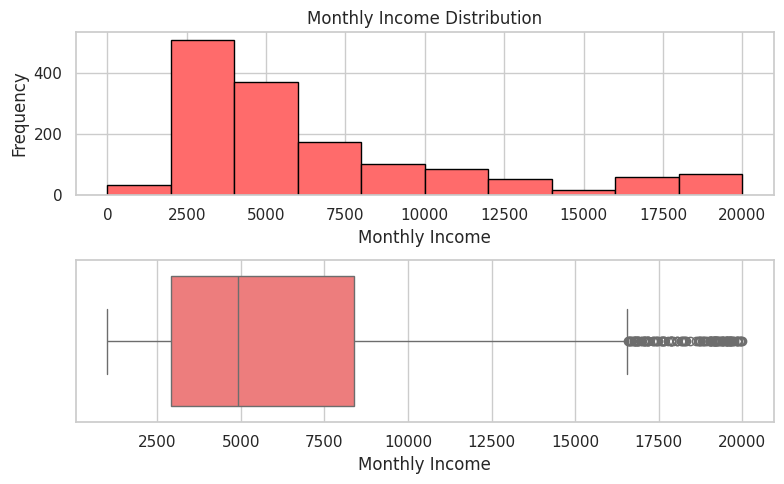

In [ ]:
# MONTHLY INCOME: histogram + boxplot
bins_income = [0, 2000, 4000, 6000, 8000, 10000,
               12000, 14000, 16000, 18000, 20000]

plt.figure(figsize=(8, 5))

# Top: histogram
plt.subplot(2, 1, 1)
plt.hist(df["MonthlyIncome"], bins=bins_income,
         edgecolor="black", color="#FF6B6B")
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.title("Monthly Income Distribution")

# Bottom: boxplot for outliers
plt.subplot(2, 1, 2)
sns.boxplot(x=df["MonthlyIncome"], color="#FF6B6B")
plt.xlabel("Monthly Income")

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()



The histogram's distribution is heavily right-skewed, meaning most employees earn on the lower end of the salary range while fewer employees earn very high incomes.

Most employees cluster between 2,000 and 6,000, shown by the tall bars on the left side of the histogram.

a small number of employees earn more than 15 000 per month producing a long right tail.

Very high earners (12,000–20,000) are rare, shown by much shorter bars on the right.

This pattern is typical in organisations with many entry-/mid-level staff and a small number of senior or specialist roles earning significantly more.

The boxplot clearly shows alot of outliers of the high income end and these are expected for senior leadership roles or specialised technicians

the center of the distribution which is the median sits above the lower income boundary





Income is very unevenly distributed showing a wide range in job levels. the very higher earners are genunine outliers but not errors

We visulaise working years to understand employee experince levels and potential progression in career patterns.

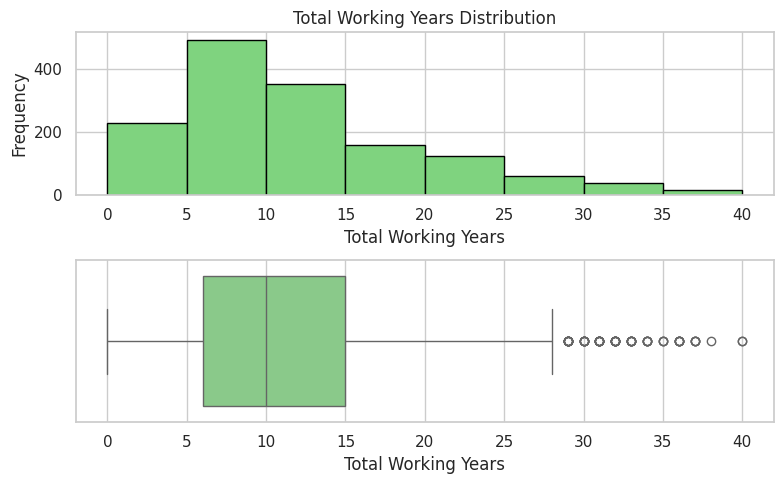

In [ ]:
# TOTAL WORKING YEARS: histogram + boxplot
bins_years = [0, 5, 10, 15, 20, 25, 30, 35, 40]

plt.figure(figsize=(8, 5))

# Top: histogram
plt.subplot(2, 1, 1)
plt.hist(df["TotalWorkingYears"], bins=bins_years,
         edgecolor="black", color="#7FD37F")
plt.xlabel("Total Working Years")
plt.ylabel("Frequency")
plt.title("Total Working Years Distribution")

# Bottom: boxplot for outliers
plt.subplot(2, 1, 2)
sns.boxplot(x=df["TotalWorkingYears"], color="#7FD37F")
plt.xlabel("Total Working Years")

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()



the histogram shows that most employees have between 5 and 15 years of total experince and there is a group with 0-3 years the eary career employees

the right tail extends towards 30-40 years, but these are alot rarer and the boxplot confirms that several high end outliers are employees with 30-40 years of experince and the median working years lies around 10 years



most of the employees have a middle level of experince with a small group of highly experinced workers which are acting as the lgitimate outliers

**Frequency of categorical columns Job Role,Department and Education Field using bar Charts**

Here we plot job role counts to understand the organisational structure and workforce composition

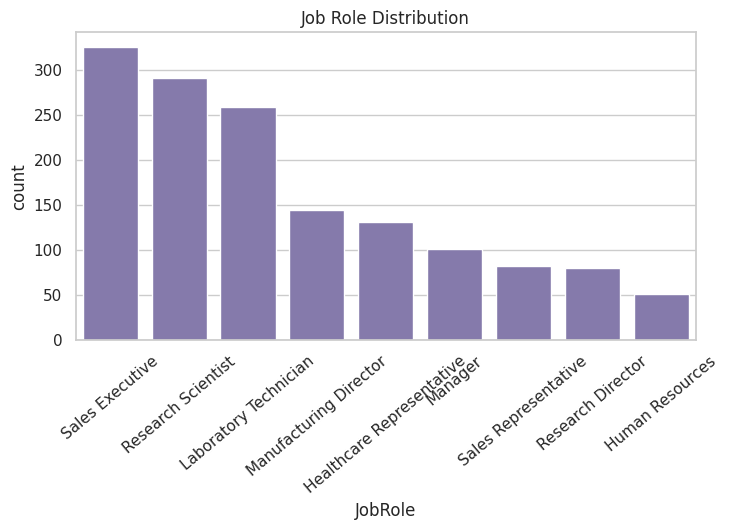

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = df["JobRole"], color = "m")
plt.title("Job Role Distribution")
plt.xticks(rotation = 40)
plt.show()

The countplot shows distribution is uneven, with some roles far more common.

Sales Executive, Research Scientist, and Laboratory Technician show the highest counts.

slae executive is the largest job role group with aroung 325 employees and reserach scientist and laboratory technician follow

Roles like Research Director, Sales Representative, and Human Resources have much fewer employees and appear in smaller numbers around 100 - 150

Indicates the company is built around scientific, technical, and sales-focused roles, with fewer managerial or specialised positions

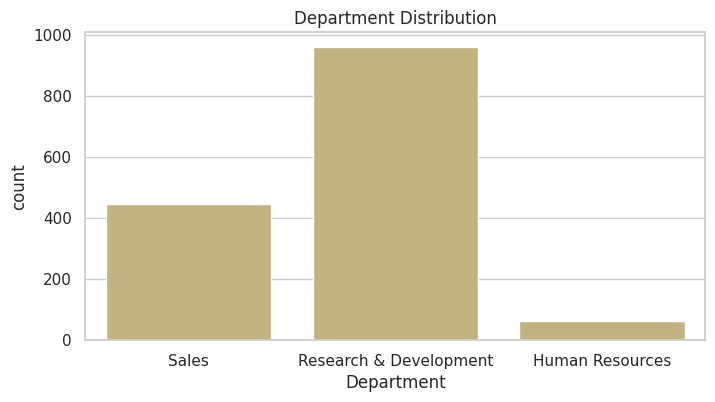

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = df["Department"], color = "y")
plt.title("Department Distribution")
plt.show()

Research & Development is by far the largest department around 950 employees

Sales comes next around 450 employees

Human Resources has the smallest number around 70 employees

This shows the organisation is heavily R&D-driven, with Sales supporting it and HR operating as a much smaller administrative unit and HR are proportionally low

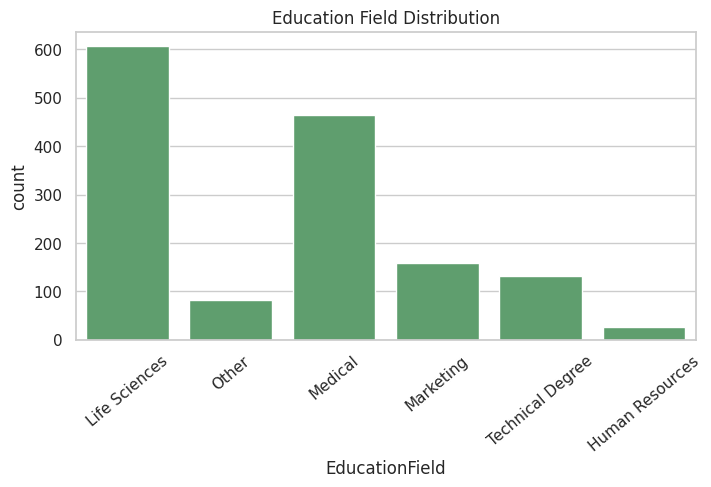

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = df["EducationField"], color = "g")
plt.title("Education Field Distribution")
plt.xticks(rotation = 40)
plt.show()

Most employees come from Life Sciences and Medical backgrounds around 610 employees

Fields like Marketing, Technical Degree, and Other appear moderately represented and very minimal around 20 employees

Human Resources as an education field is the least common

Overall, this reflects a company heavily staffed by scientific and technical professionals

The work force is heavily STEM Scince and medical oriented which aligns with company's strong R&D focus

##**2.4. Relationships**

Now begins visualisations of categorical fearures vs the target variable which is attrition

**Attrition vs. Categorical Features**

First we calculate the proportion of employees who stayed or left within each business travel category. we use crosstab with normalize="index" so that each row adds up to 1. this turns raw counts into within group proportions making it easier to compare attrition risk across travel types

In [ ]:
bytravel = pd.crosstab(
    df["BusinessTravel"],
    df["Attrition"],
    normalize="index"
)


In [ ]:
bytravel

Attrition,No,Yes
BusinessTravel,,
Non-Travel,0.920000,0.080000
Travel_Frequently,0.750903,0.249097
Travel_Rarely,0.850431,0.149569


the bytravel table gives one row per travel category and two columns NO and Yes with values between 0 and 1 and so the output tells us Non travel employees 0.92 NO didn't leave and 0.08 did leave
Travel rarely 0.15 left and travel frequently 0.75 didn't leave and 0.25 did leave

Plotting a stacked barchart to illustrate this make the differences in attrition proportions across travel categories easier to see at a glance

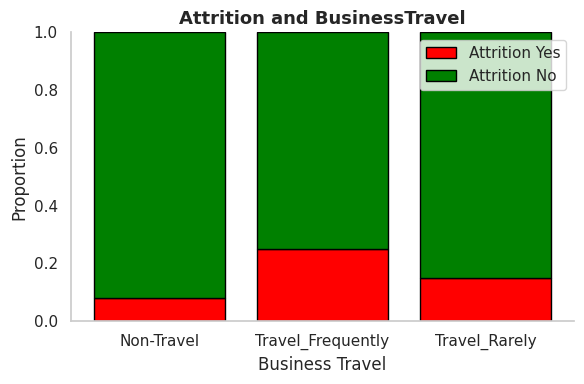

In [ ]:

plt.figure(figsize=(6, 4))

categories = bytravel.index
yes_vals = bytravel["Yes"].values
no_vals  = bytravel["No"].values

x = np.arange(len(categories))

plt.bar(
    x,
    yes_vals,
    color="red",
    edgecolor="black",
    label="Attrition Yes"
)

plt.bar(
    x,
    no_vals,
    bottom=yes_vals,
    color="green",
    edgecolor="black",
    label="Attrition No"
)

plt.xticks(x, categories, rotation=0)
plt.ylabel("Proportion")
plt.xlabel("Business Travel")
plt.ylim(0, 1)
plt.grid(False)
sns.despine()
plt.legend()

plt.title("Attrition and BusinessTravel", fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()





 We can see that among employees who travel a lot, the attrition rate is much higher travel frequently has the largest red segment "Yes" with around quarter of employees leaving

 Travel frequently shows the highest proportion of employees who resigned about 25% , Travelling rarely has a moderate attrition rate around 15% and non travel employees have the lowest attrition aroung 8-11% at risk of attrition

 this gives a conclusion that frequent travel is associated with higher attrition risk.

We then turn the department table into a horizontal so we can visually compare attrition proportions across departments

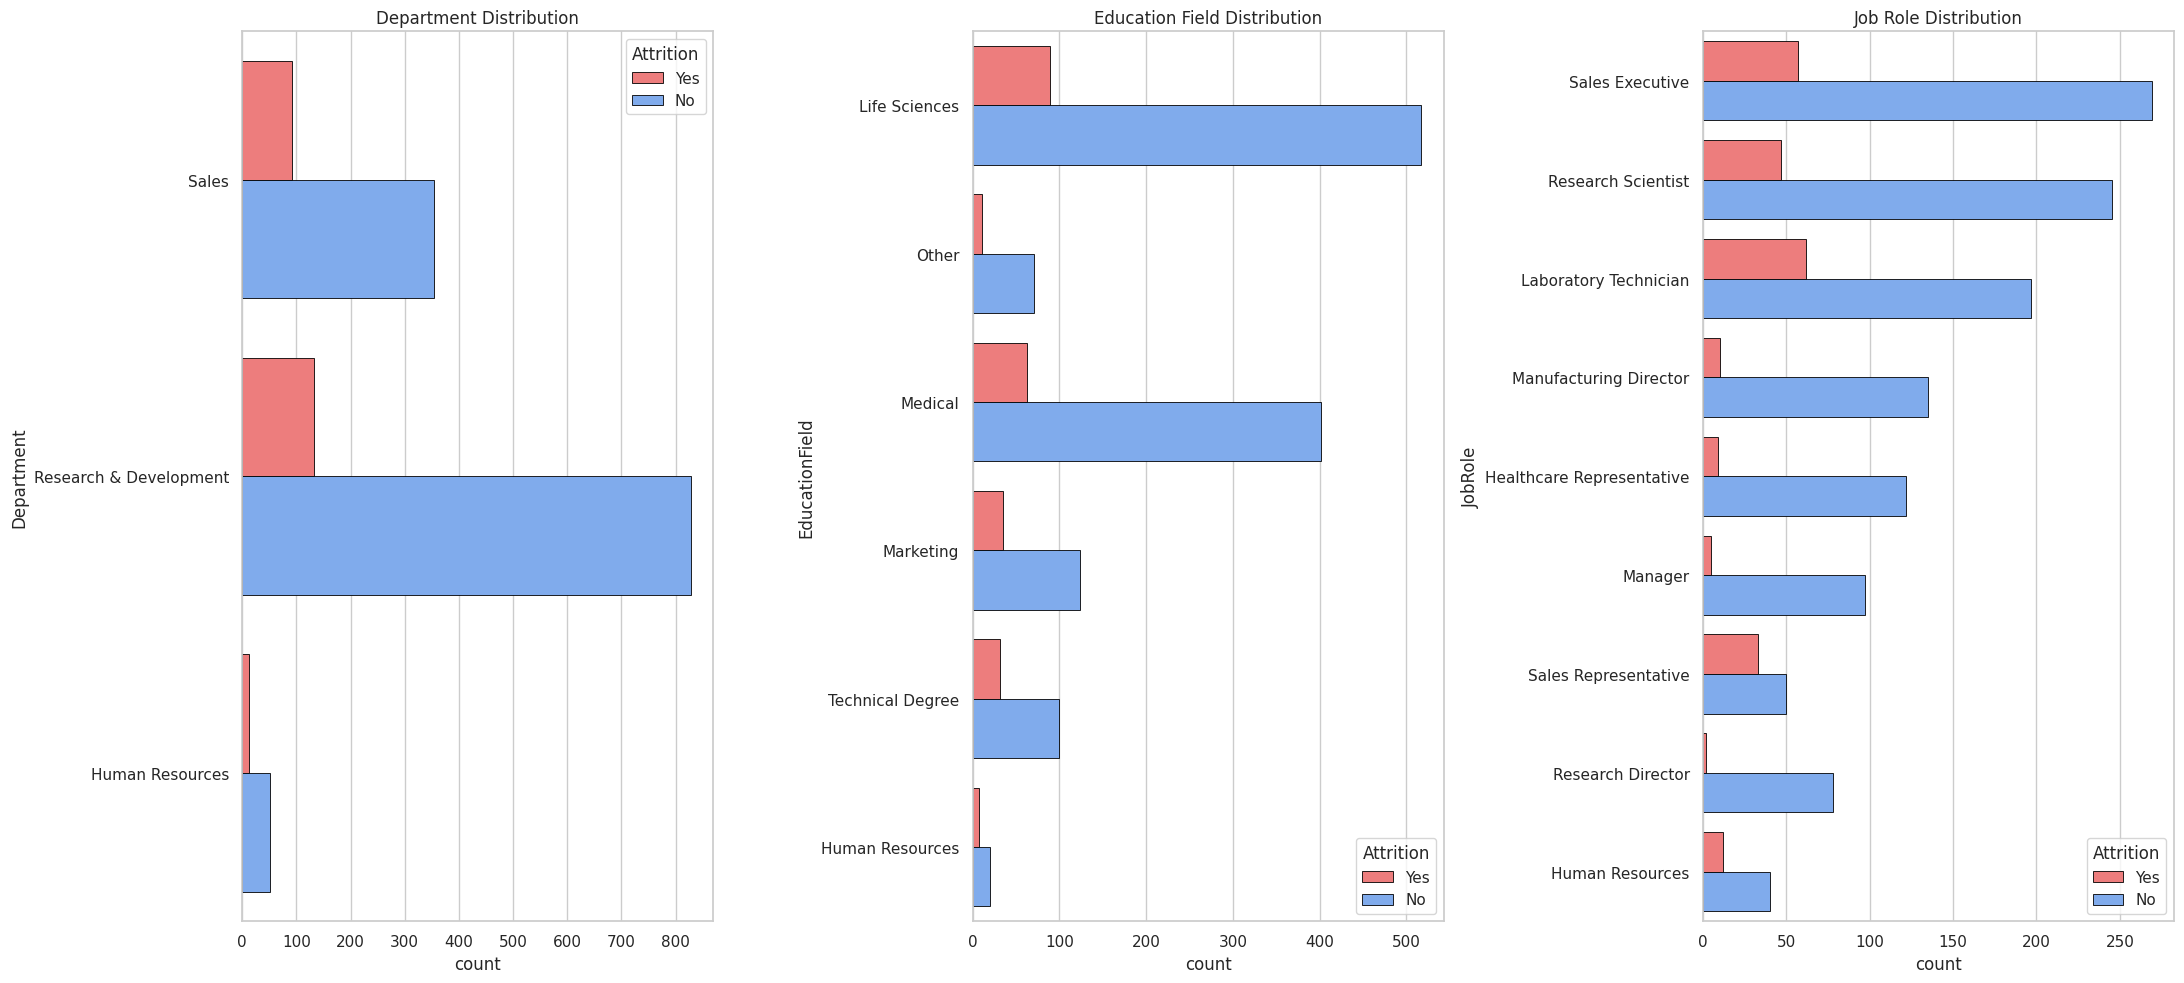

In [ ]:
# Count plots for Job Role, Department, Education Field segmented by Attrition.

fig, axes = plt.subplots(1, 3, figsize=(22, 10))
sns.set_theme(style="whitegrid")

palette = ["#FF6B6B", "#6EA8FE"]

sns.countplot(
    data=df,
    y="Department",
    hue="Attrition",
    palette=palette,
    edgecolor="black",
    linewidth=0.6,
    ax=axes[0]
)
axes[0].set_title("Department Distribution")

sns.countplot(
    data=df,
    y="EducationField",
    hue="Attrition",
    palette=palette,
    edgecolor="black",
    linewidth=0.6,
    ax=axes[1]
)
axes[1].set_title("Education Field Distribution")

sns.countplot(
    data=df,
    y="JobRole",
    hue="Attrition",
    palette=palette,
    edgecolor="black",
    linewidth=0.6,
    ax=axes[2]
)
axes[2].set_title("Job Role Distribution")

plt.tight_layout()
plt.show()


Department

The Research & Development department has the largest workforce but it also experiences high attrition with count of about 150 although the majority of employees stay

The Sales department shows a relatively higher proportion of attrition of 100 compared to its total workforce
The Human Resources department has the smallest workforce and exhibits minimal attrition

Education Field

Employees with a background in Life Sciences and Medical fields dominate the workforce. However, attrition is more noticeable in these fields particularly in Life Sciences simply due to their large size attrition is around 100 count

Fields like Marketing, Technical Degree, and Human Resources exhibit lower attrition rates relative to theri size possibly telling better alignment with job roles or satisfaction levels

attrition is broadly distributed across education fields with slight attrition in technical and business employees

Job Role

Sales Executive and Research Scientist roles have the highest counts of employees but attrition is relatively higher in these roles compared to others with count of 240 to over 250

Laboratory Technician also shows a significant number of employees leaving, indicating potential dissatisfaction or challenges in this role

Roles like Manager, Research Director, and Healthcare Representative have lower attrition rates, suggesting better retention in these positions

Barchart demographic features against employee attrition

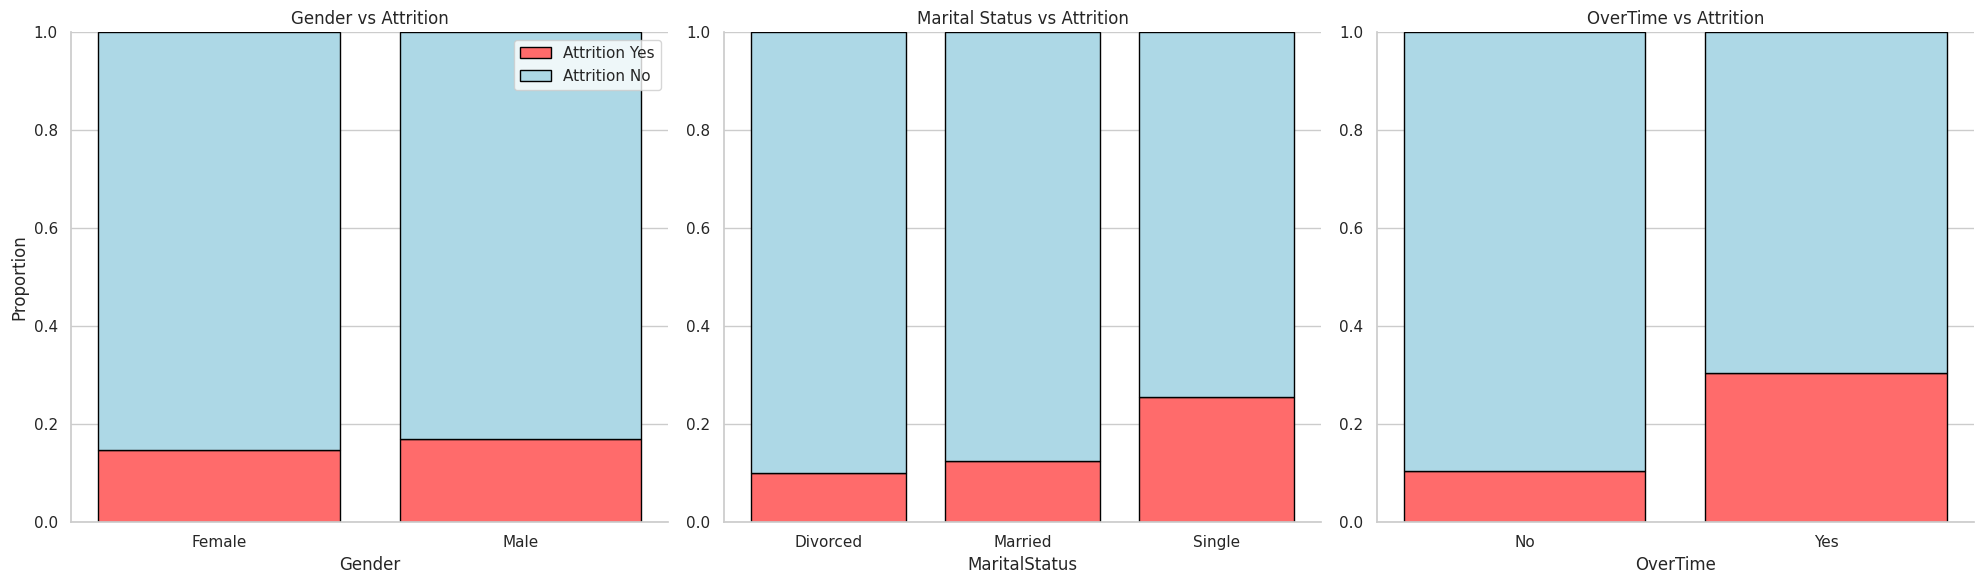

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_theme(style="whitegrid")

features = ["Gender", "MaritalStatus", "OverTime"]
titles = ["Gender vs Attrition", "Marital Status vs Attrition", "OverTime vs Attrition"]

for i, col in enumerate(features):

    table = (
        df.groupby(col)["Attrition"]
          .value_counts(normalize=True)
          .unstack()
          [["Yes", "No"]]
    )

    x = np.arange(len(table.index))
    yes_vals = table["Yes"].values
    no_vals  = table["No"].values

    axes[i].bar(
        x,
        yes_vals,
        color="#FF6B6B",
        edgecolor="black",
        label="Attrition Yes"
    )

    axes[i].bar(
        x,
        no_vals,
        bottom=yes_vals,
        color="lightblue",
        edgecolor="black",
        label="Attrition No"
    )

    axes[i].set_xticks(x)
    axes[i].set_xticklabels(table.index)
    axes[i].set_ylim(0, 1)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)
    if i == 0:
        axes[i].set_ylabel("Proportion")
    else:
        axes[i].set_ylabel("")

    sns.despine(ax=axes[i])

axes[0].legend()

plt.tight_layout()
plt.show()


Marital Status vs Attrition

Single employees have a noticeably higher attrition proportion around 25%

Married and divorced employees show significantly lower attrition around 10-12%

so Younger single employees tend to leave more often likely due to little to no responsability or high need to stay working


OverTime vs Attrition

Employees who work OverTime show a very high attrition proportion around 30%

Employees with No OverTime show much lower attrition around 10-12%

this tells that workload stress is a huge major attrition driver in this company

Gender vs Attrition

Males and females have very similar attrition proportions around 15-17%

No meaningful gender-based difference appears so it is not an influence of attrition





**Attrition vs. numerical Features**



Comparing Average Monthly income, total working  years , and Age distributions for employees who left vs. stayed

In [ ]:
left_df = df[df['Attrition'] == 'Yes']
stayed_df = df[df['Attrition'] == 'No']

In [ ]:
avg_income_left = left_df['MonthlyIncome'].mean().round(2)
avg_income_stayed = stayed_df['MonthlyIncome'].mean().round(2)

In [ ]:
avg_income_left

np.float64(4787.09)

In [ ]:
avg_income_stayed

np.float64(6832.74)

In [ ]:
income_diff = avg_income_stayed - avg_income_left
income_diff.round(2)

np.float64(2045.65)

In [ ]:
left_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0.0,8,0.0,1,6,4,0.0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0.0,7,3.0,3,0,0,0.0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0.0,6,4.0,3,4,2,0.0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0.0,10,4.0,3,5,3,0.0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0.0,8,2.0,3,4,2,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1.0,1,3.0,2,1,0,1.0,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3.0,4,3.0,4,2,2,2.0,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1.0,14,4.0,1,10,9,9.0,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2.0,12,3.0,3,6,3,0.0,1


In [ ]:
stayed_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1.0,10,3.0,3,10,7,1.0,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0.0,8,3.0,3,8,7,3.0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1.0,6,3.0,3,2,2,2.0,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0.0,8,2.0,2,7,7,3.0,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3.0,12,3.0,2,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1.0,17,3.0,3,5,2,0.0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1.0,9,5.0,3,7,7,1.0,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1.0,6,0.0,3,6,2,0.0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,NaN,17,3.0,2,9,6,0.0,8


We plot the distributions of Monthly Income, Total Working Years, and Age separately for employees who stayed and those who left

Overlaying histograms distplots allows us to compare both shape and concentration of each group, which helps identify numerical patterns linked to attrition

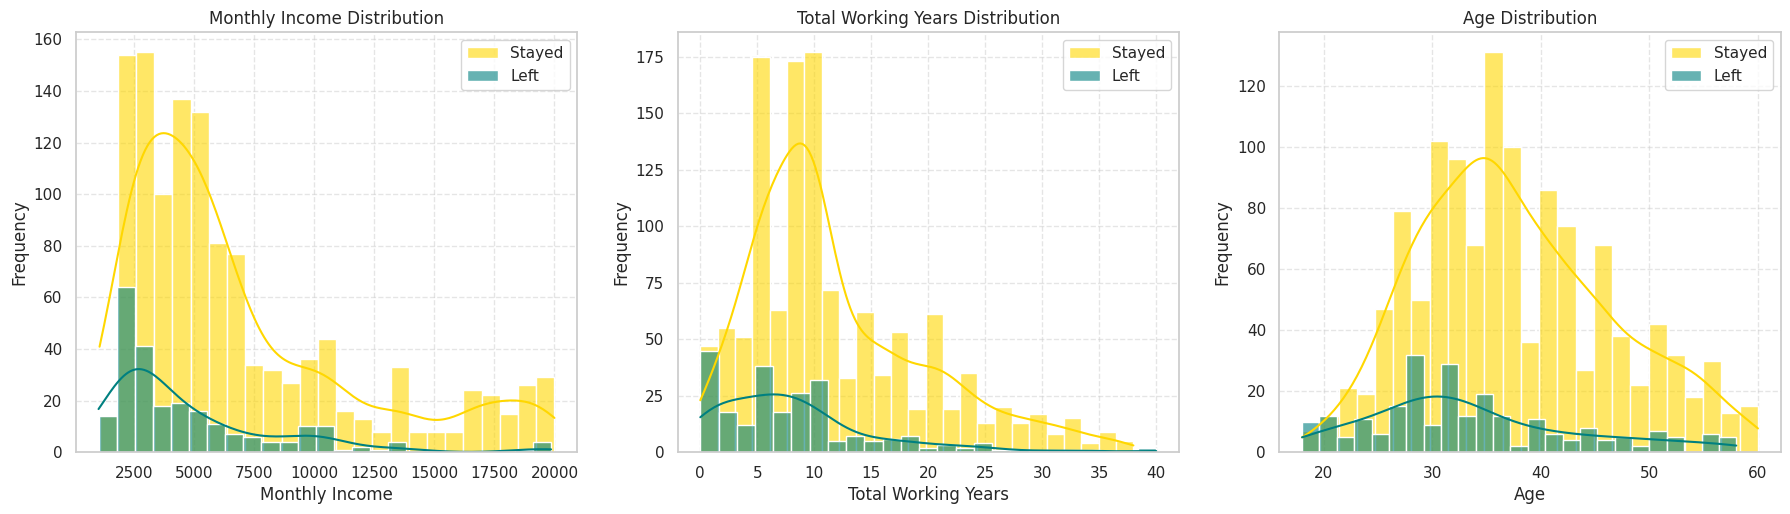

In [ ]:
#distplots
sns.set_style("whitegrid")

plt.figure(figsize=(22, 12))

plt.subplot(2, 3, 1)
sns.histplot(stayed_df["MonthlyIncome"], bins=25, kde=True, color="gold", alpha=0.6, label="Stayed")
sns.histplot(left_df["MonthlyIncome"],   bins=25, kde=True, color="teal", alpha=0.6, label="Left")

plt.title("Monthly Income Distribution")
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.subplot(2, 3, 2)
sns.histplot(stayed_df["TotalWorkingYears"], bins=25, kde=True, color="gold", alpha=0.6, label="Stayed")
sns.histplot(left_df["TotalWorkingYears"],   bins=25, kde=True, color="teal", alpha=0.6, label="Left")

plt.title("Total Working Years Distribution")
plt.xlabel("Total Working Years")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.subplot(2, 3, 3)
sns.histplot(stayed_df["Age"], bins=25, kde=True, color="gold", alpha=0.6, label="Stayed")
sns.histplot(left_df["Age"],   bins=25, kde=True, color="teal", alpha=0.6, label="Left")

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()






for monlthy income , the plot shows employees who left (green curve) cluster heavily between 2000 and 5000. the distribution for leavers is steep, narrow and left skewed showing that most who leave earn on the lower end and employees who stayed (yellow curve) have a much wider spread covering incomes from 2000 up to nearly 20 000
the peak for styaers is higher and broader means the group is more diverse in income levels

for total working years, leavers cluster in the 0-10 years range their distribution is narrow and drops sharply after about 12 years
stayers show long tail extending up to 40 and have a broader peak around 8 to 15 years  



Monthly Income: Employees who left seem to have lower income distributions compared to those who stayed

Total Working Years: Employees with fewer working years seem more likely to leave

Age: Younger employees have higher attrition, while older employees tend to stay

Violin plots for better visulisation

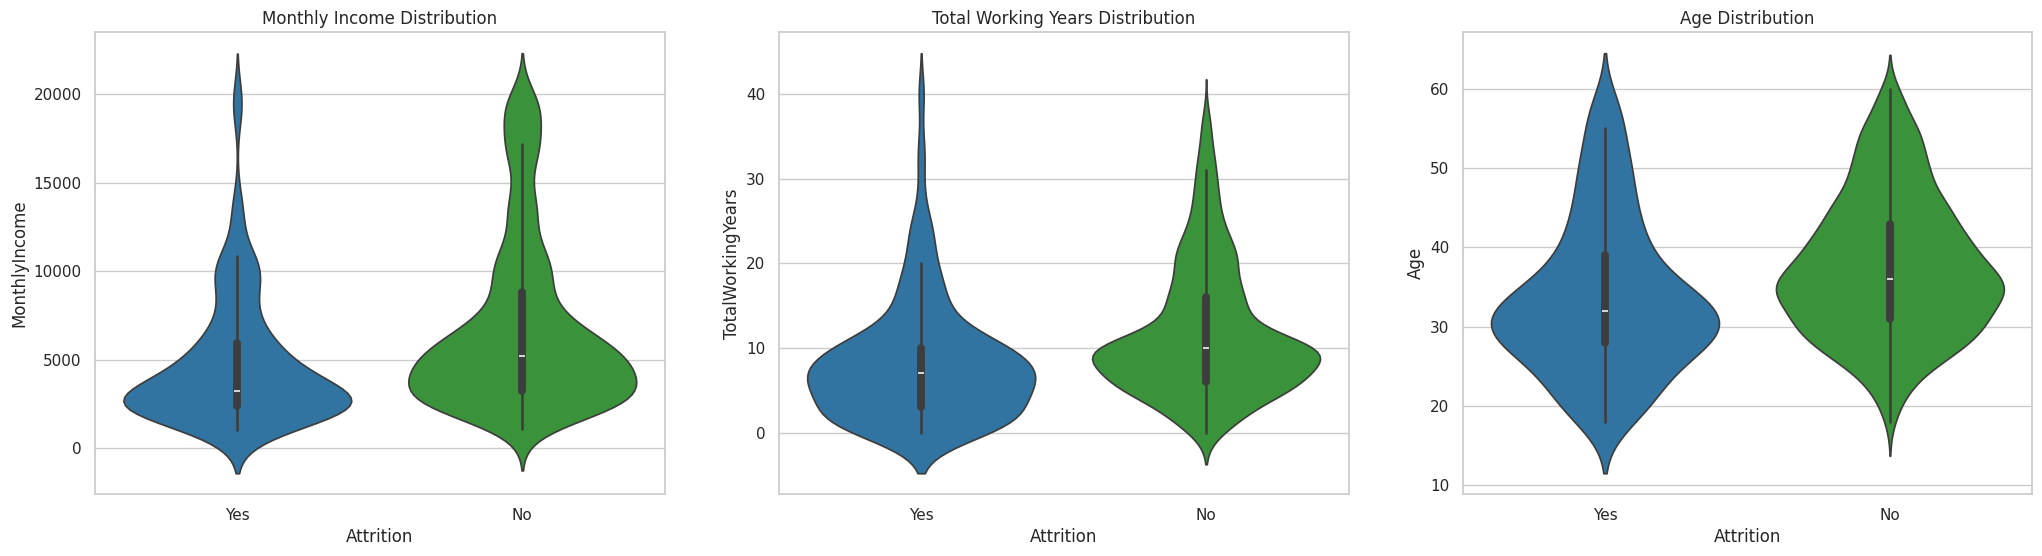

In [ ]:

plt.figure(figsize = (25, 6))

palette = ["#1f77b4", "#2ca02c"]

# Monthly Income
plt.subplot(1, 3, 1)
sns.violinplot(data = df, x = "Attrition", y = "MonthlyIncome",
               hue = "Attrition", palette = palette)
plt.title("Monthly Income Distribution")

# Total Working Years
plt.subplot(1, 3, 2)
sns.violinplot(data = df, x = "Attrition", y = "TotalWorkingYears",
               hue = "Attrition", palette = palette)
plt.title("Total Working Years Distribution")

# Age
plt.subplot(1, 3, 3)
sns.violinplot(data = df, x = "Attrition", y = "Age",
               hue = "Attrition", palette = palette)
plt.title("Age Distribution")

plt.show()


Monthly Income: The violin plot shows a clear gap between the two groups employees who left are tightly concentrated in the lower-income range,

 while those who stayed display a much wider distribution that extends into significantly higher salary levels. This visual gap confirms that lower-income employees are substantially more likely to leave the organisation

Total Working Years: the violin plot shows that while longer-tenured and more experinced employees nearly completely appear in the "stay" category employees with less total working years make up the majority of the attrition group. this rienforces the earlier histogram findings by showing that shorter career experince is strongly associated with higher attrition

Age: The attrition group is highly concentrated at younger ages, with very few leavings happening after the mid-30s, according to the violin plot.  The distribution of those who remain, however, covers a far wider age range.  This l support to the interpretation that younger workers have higher attrition, most likely as a result of career exploration, increased mobility, or outside possibilities.



Career progression features vs Attrition

We bin yearsat features into meaningful experince groups eg <1 1-3 3-5 5-10 10+) and calcullate the percentage of departing employees in each bin. this tells whether long term employees mid career or new are likely to leave

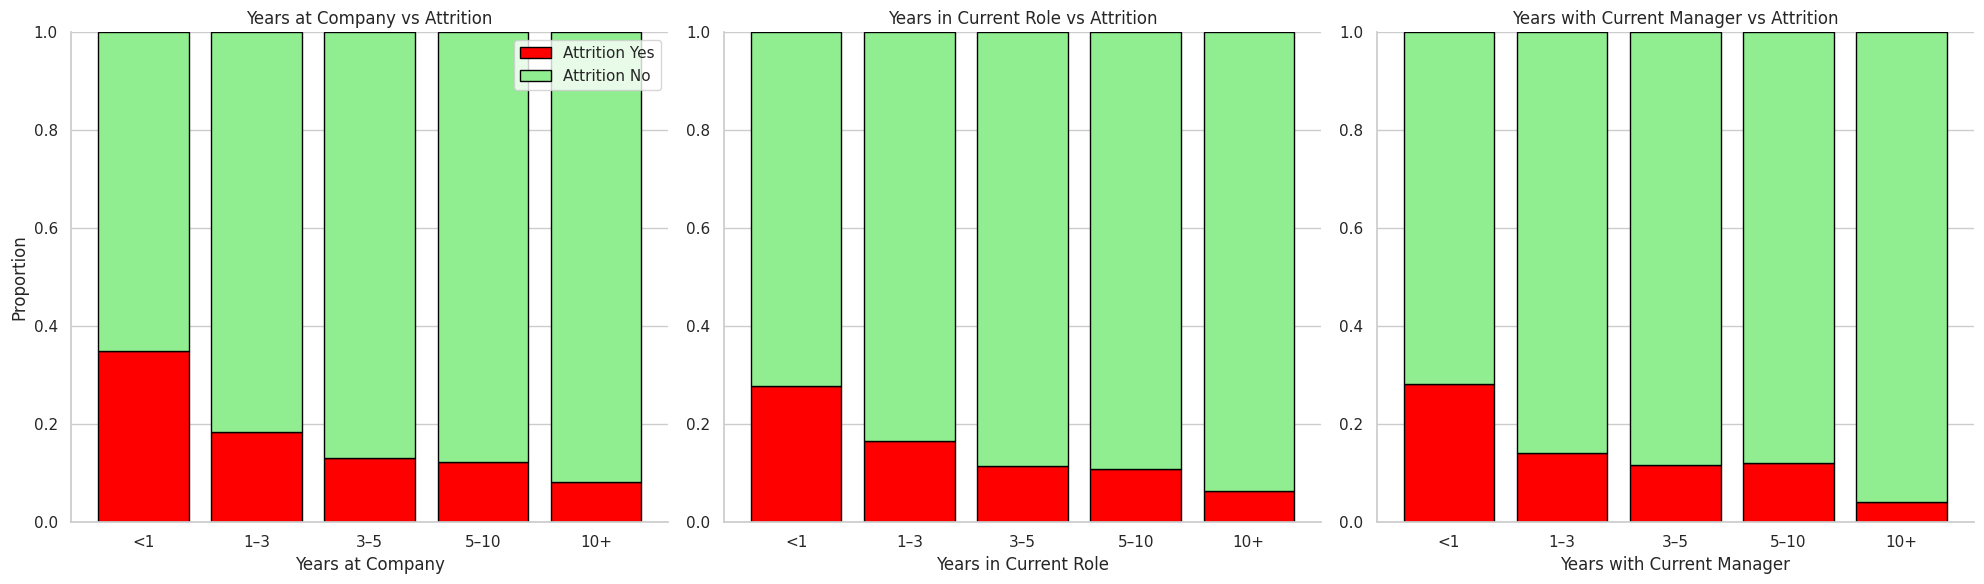

In [ ]:

sns.set_theme(style="whitegrid")

career_features = {
    "YearsAtCompany": "Years at Company",
    "YearsInCurrentRole": "Years in Current Role",
    "YearsWithCurrManager": "Years with Current Manager"
}

bins = [0, 1, 3, 5, 10, 40]
labels = ["<1", "1–3", "3–5", "5–10", "10+"]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for ax, (col, label_name) in zip(axes, career_features.items()):

    temp = df.copy()
    temp["bin"] = pd.cut(temp[col], bins=bins, labels=labels, include_lowest=True)

    table = (
        temp.groupby("bin")["Attrition"]
            .value_counts(normalize=True)
            .unstack()[["Yes", "No"]]
            .fillna(0)
    )

    x = np.arange(len(labels))
    yes_vals = table["Yes"].values
    no_vals  = table["No"].values

    ax.bar(x, yes_vals, color="red", edgecolor="black", label="Attrition Yes")
    ax.bar(x, no_vals, bottom=yes_vals, color="lightgreen", edgecolor="black", label="Attrition No")

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 1)
    ax.set_title(f"{label_name} vs Attrition")
    ax.set_xlabel(label_name)
    sns.despine(ax=ax)

axes[0].set_ylabel("Proportion")
axes[0].legend()

plt.tight_layout()
plt.show()




Years at Company, Years in Current Role, and Years with Current Manager:

Attrition is highest in the early stages of employment or role placement

The highest attrition rates, between 28 and 35%, are seen in workers who have been with the company, in a new role, or under a new boss for less than a year.

This suggests that the first year is the most prone to attrition

Attrition decreases steadily as tenure increases

Attrition decreases for each of the three features:

1–3 years is noticeable reduction,
3–5 years is stabilisation,
5–10 years is low attrition

10+ years is very low attrition often below 10%

This implies a gradual decrease in mobility and an increase in organisational attachment

A key factor in retention is manager stability.

Employees with <1 year with their current manager have very high attrition

Long-term manager relationships 10+ years are related with the strongest retention in the dataset

Career transitions may trigger attrition

High attrition in the <1 year in current role category tells that role changes create risk possibly because of uncertainty with new responsibilities

Tenure-related features are strong attrition predictors

The consistent downward trend across all three plots demonstrates that tenure is a highly influential factor



Satisfaction and experince vs Attrition

In this step examing whether employees who leave report lower statisfaction and invovelment.

we extract four features then calculate the average rating 1-4 for each feature grouped by attrition

In [ ]:
sns.set_theme(style="whitegrid")

# Satisfaction / experience features to compare
satisfaction_features = [
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "WorkLifeBalance",
    "JobInvolvement"
]

df_clean = df.copy()
df_clean["Attrition"] = df_clean["Attrition"].str.strip().str.title()   # "yes"/"Yes " -> "Yes"

grouped_means = df_clean.groupby("Attrition")[satisfaction_features].mean()

print(grouped_means)

           JobSatisfaction  EnvironmentSatisfaction  WorkLifeBalance  \
Attrition                                                              
No                2.778589                 2.771290         2.781022   
Yes               2.468354                 2.464135         2.658228   

           JobInvolvement  
Attrition                  
No               2.770479  
Yes              2.518987  


the printed table shows that employees who left consistently have lower average scores across four satisfaction features

Lower job satisfaction with employees who leave
Environment Leavers satisfaction is lower.
Work-Life Balance: slightly reduced for those who leave
Leavers' job involvement is significantly lower.

across every measure employees who resigned report worse experinces than those who stayed and this suggests lower satisfaction and engagement are linked higher attrition

We visualise results using a grouped bar chart

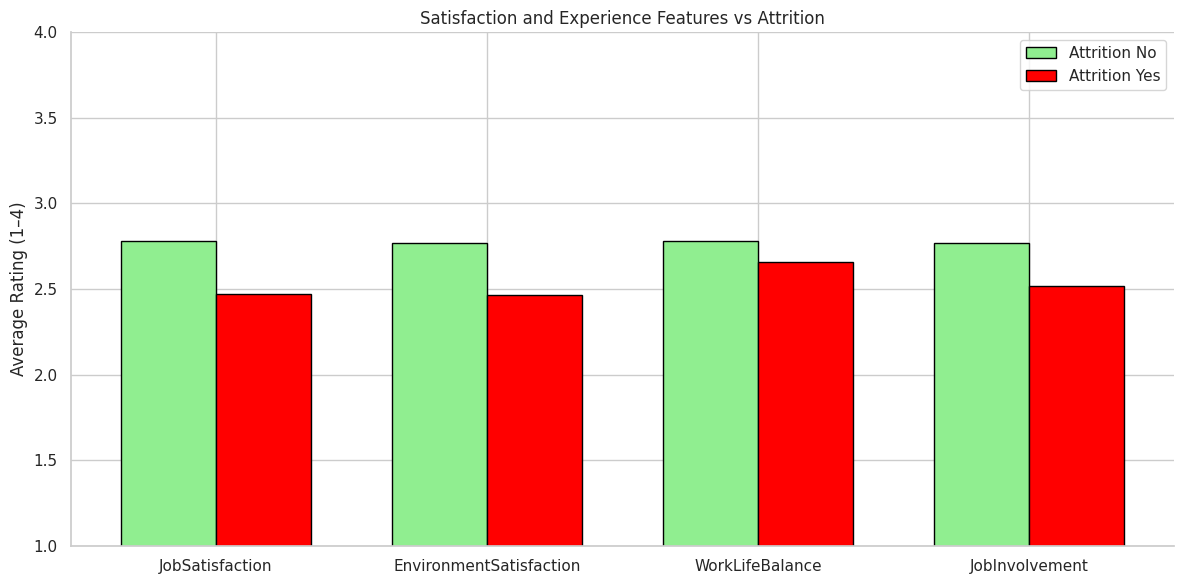

In [ ]:

sns.set_theme(style="whitegrid")

# Satisfaction / experience features to compare
satisfaction_features = [
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "WorkLifeBalance",
    "JobInvolvement"
]

x = np.arange(len(satisfaction_features))
bar_width = 0.35

plt.figure(figsize=(12, 6))

# Bars for Attrition No (stayed)
plt.bar(
    x - bar_width / 2,
    grouped_means.loc["No"],
    width=bar_width,
    color="lightgreen",
    edgecolor="black",
    label="Attrition No"
)

# Bars for Attrition Yes (left)
plt.bar(
    x + bar_width / 2,
    grouped_means.loc["Yes"],
    width=bar_width,
    color="red",
    edgecolor="black",
    label="Attrition Yes"
)

plt.xticks(x, satisfaction_features, rotation=0)
plt.ylim(1, 4)  # ratings go from 1 to 4
plt.ylabel("Average Rating (1–4)")
plt.title("Satisfaction and Experience Features vs Attrition")
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()



the grouped bar chart shows a consistent pattern across all four satisfaction and involvement features

employees who left rate every experince feature lower the red bars are consistently shorter than green bars showing decreased job satisfaction, enviroment staisfaction, work-life balance and job involvement. this pattern demonstrates that leavers tend to have a poorer overall workplace experince

second the largest differnce appear in job satisfaction and enviroment satisfaction and enviroment satisfaction. these two categories show the greatest divide between stayers and departers, indicating that an employee's decision to quit may be significantly influenced by their discontent with daily responsibilities or the workplace.

 Thirdly, leavers continue to score lower in both Work-Life Balance and Job Involvement, despite the gaps being somewhat less.  This suggests that higher attrition may also be caused, albeit to a lesser extent, by problems with balance, engagement, or involvement.

 Lastly, the pattern is directional and consistent across all four features: higher attrition rates are always correlated with worse experience ratings.

**Correlation matrix for all numberical features**

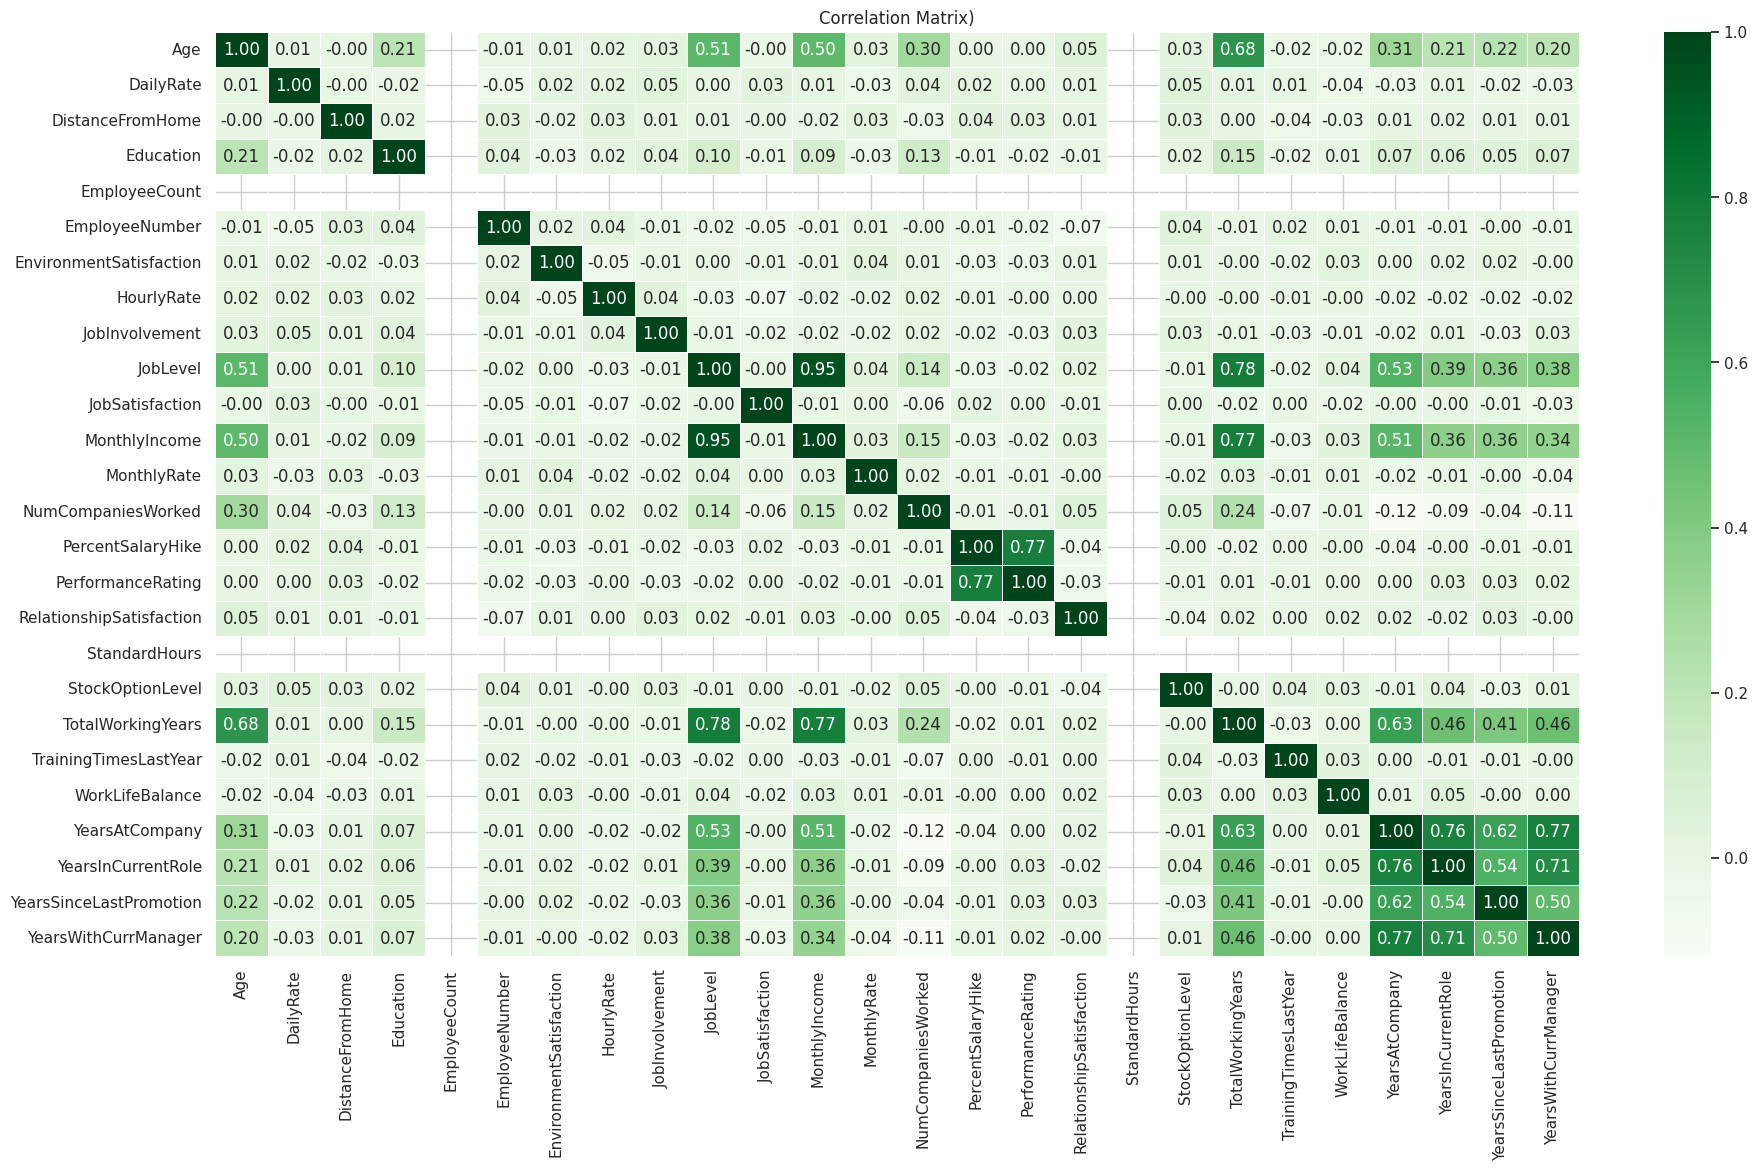

In [ ]:
corr_matrix = df.select_dtypes(include=["int", "float"]).corr()

plt.figure(figsize=(22, 12))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="Greens",
            linewidths=0.5,
            cbar=True)

plt.title("Correlation Matrix)")
plt.show()

        
JobLevel and MonthlyIncome: 0.95
     
TotalWorkingYears and MonthlyIncome: 0.78
        
YearsAtCompany and YearsInCurrentRole: 0.76
        
YearsWithCurrManager and YearsInCurrentRole: 0.77
      
TotalWorkingYears and YearsAtCompany: 0.63
   

The strong positive correlations suggest relationships tied to career progression, such as higher job levels, longer tenure, and increased income. Weak or negligible correlations indicate that certain features may not significantly impact other variables in this dataset. From this insights, we could do further analysis, such as identifying factors influencing employee satisfaction or retention

##**2.5. Outlier Detection**

 EXTRA NUMERIC FEATURES: chosen to identify possible meaningful outliers

YearsAtCompany: long-tenure employees

YearsSinceLastPromotion: very delayed promotions

YearsInCurrentRole: role stagnation

DistanceFromHome: long commutes

NumCompaniesWorked: frequent job changers

Box plots to detect outliers in the dataset

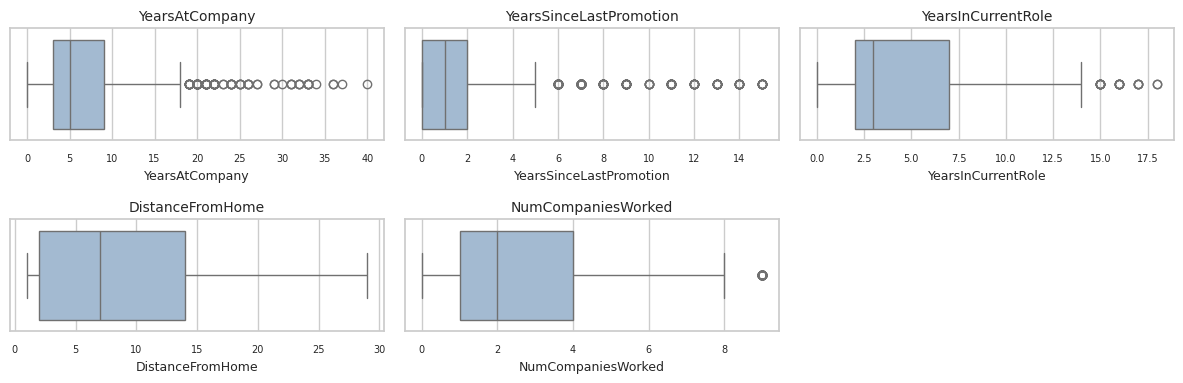

In [ ]:
sns.set_theme(style="whitegrid")

outlier_features = [
    "YearsAtCompany",
    "YearsSinceLastPromotion",
    "YearsInCurrentRole",
    "DistanceFromHome",
    "NumCompaniesWorked"
]

fig, axes = plt.subplots(2, 3, figsize=(12, 4))

axes = axes.flatten()

for i, col in enumerate(outlier_features):
    sns.boxplot(x=df[col], ax=axes[i], color="#9BBAD9")
    axes[i].set_title(col, fontsize=10)

    # Label x and y axes
    axes[i].set_xlabel(col, fontsize=9)

    axes[i].tick_params(axis='x', labelsize=7)
    axes[i].tick_params(axis='y', labelsize=7)

# Remove the empty last subplot (slot #5)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

##**2.6. Target Variable Balance**

Class distribution of the target variable - Attrition

percentage of employees who left and stayed which is attrition Yes or No

In [ ]:
left_count = df["Attrition"].value_counts()["Yes"]
stayed_count = df["Attrition"].value_counts()["No"]
total_emps = df.shape[0]

In [ ]:
left_per = round((left_count / total_emps) * 100, 2)
left_per

np.float64(16.12)

In [ ]:
stayed_per = round((stayed_count / total_emps) * 100, 2)
stayed_per

np.float64(83.88)

In [ ]:
counts = df['Attrition'].value_counts()
percentages = df['Attrition'].value_counts(normalize=True).mul(100)

summary = pd.DataFrame({
    'Count': counts,
    'Percentage (%)': percentages.round(2)
})

summary


,Count,Percentage (%)
Attrition,,
No,1233,83.88
Yes,237,16.12


16% of employees leaving the company yes for attrition and 83% remaining


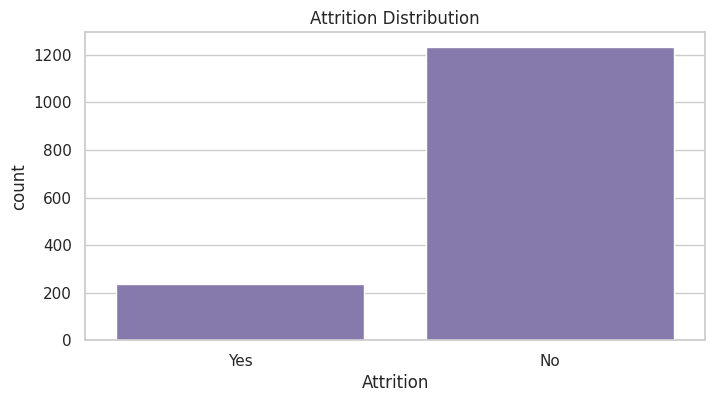

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = df["Attrition"], color = "m")
plt.title("Attrition Distribution")
plt.show()

The chart demonstrates a significant class imbalance: only a tiny percentage of workers left (Yes), while the bulk stayed (No).  This suggests that attrition is rather uncommon in the dataset, and in order to prevent bias against the majority class during modelling, this imbalance must be taken into account.

 # **Section 3: Data Preprocessing and Cleaning (Mohamed Dahir)**

We’ll use this section to prepare the IBM HR Employee Attrition dataset for a classification model that predicts whether an employee will leave the company. We’ll systematically check common data quality issues (missing values, duplicates, incorrect data types, constant or irrelevant features, and target imbalance), clean them where necessary, and encode the target variable Attrition as 0/1 so the data is ready for later model building. At each stage, we’ll start with a reasonable assumption and then confirm or reject it using code.

###**3.1 Handling Missing Values**`

We assume there might be missing values and we want to find out if that is actually true.


In [ ]:
missing_per_column = df.isna().sum()
total_missing = missing_per_column.sum()

In [ ]:
print("Total missing values in dataset:", total_missing)
print("\nMissing values per column:")
print(missing_per_column[missing_per_column > 0])

Total missing values in dataset: 749

Missing values per column:
StockOptionLevel           514
TrainingTimesLastYear      103
YearsSinceLastPromotion    132
dtype: int64


In [ ]:
missing_pct = round(df.isnull().sum()/len(df) * 100, 1)
print(missing_pct)

Age                          0.0
Attrition                    0.0
BusinessTravel               0.0
DailyRate                    0.0
Department                   0.0
DistanceFromHome             0.0
Education                    0.0
EducationField               0.0
EmployeeCount                0.0
EmployeeNumber               0.0
EnvironmentSatisfaction      0.0
Gender                       0.0
HourlyRate                   0.0
JobInvolvement               0.0
JobLevel                     0.0
JobRole                      0.0
JobSatisfaction              0.0
MaritalStatus                0.0
MonthlyIncome                0.0
MonthlyRate                  0.0
NumCompaniesWorked           0.0
Over18                       0.0
OverTime                     0.0
PercentSalaryHike            0.0
PerformanceRating            0.0
RelationshipSatisfaction     0.0
StandardHours                0.0
StockOptionLevel            35.0
TotalWorkingYears            0.0
TrainingTimesLastYear        7.0
WorkLifeBa

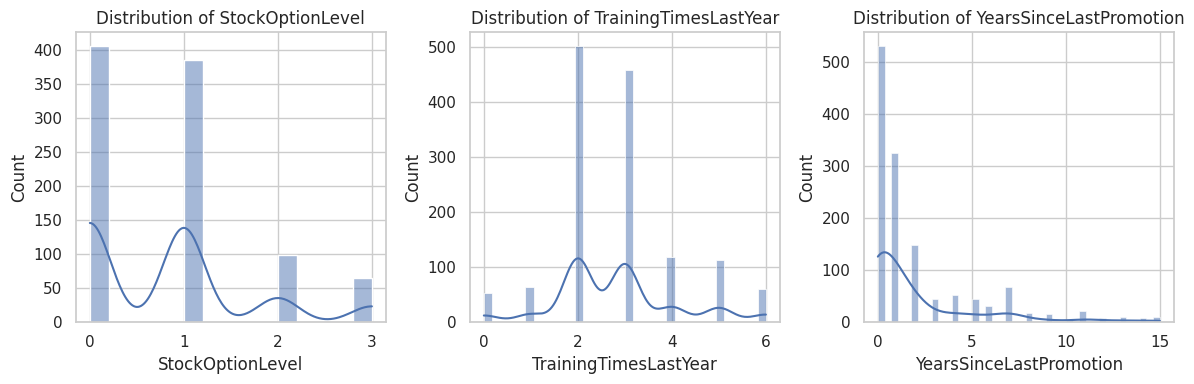

In [ ]:
features = ["StockOptionLevel", "TrainingTimesLastYear", "YearsSinceLastPromotion"]

plt.figure(figsize=(12, 4))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

We have 749 missing values spread across 3 features. 1 of those features, "StockOptionLevel" has 35% of values missing. We must decide on what to do; median imputation will be the best good approach however in this instance, we will go with dropping it because it has too much missing values and it's positvely skewed.

We will use median imputation for "YearsSinceLastPromotion". Median imputation is the best option because it replaces missing values with the middle value of the data, which prevents extreme values from skewing the results further. As for "TrainingTimesLastYear", we see it somewhat has a symmetrical distribution, therefore we will use the mean as this is the best form of imputation.

In [ ]:
df = df.drop(columns=["StockOptionLevel"])

In [ ]:
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].fillna(df['TrainingTimesLastYear'].median())
df['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].fillna(df['YearsSinceLastPromotion'].median())

In [ ]:
print(df.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

###**3.2 Identification and Removal of Duplicate Entries**`

Now we test whether the dataset contains duplicated records.

In [ ]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


0 duplicates, therefore our hypothesis is rejected.

### **3.3 Data Types Review**

We expect certain columns like years and levels to be integers, but might be stored as 'float64'.

In [ ]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


YearsSinceLastPromotion is a floats when it should be an integers. Reason: it's a decimals and this makes no sense conceptually. Therefore, we will convert it into an integers.

In [ ]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


All integer-based columns shown are correctly typed. This is because they represent counts (YearsAtCompany), ratings (JobSatisfaction), and employee identifiers (EmployeeNumber) which is the appropriate datatype for such features.

The following features are correctly identified as 'objects': Department, BusinessTravel, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime

Later, we will encode them later for feature engineering prep.

### **3.4 Evaluation of Non-Informative Features**

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

We will remove the following features from our dataset: EmployeeCount, StandardHours, Over18, EmployeeNumber. Reason: These features will be removed because they are constant or contain no meaningful variation, meaning they cannot contribute to the predictive power of the classification model.

In [ ]:
df = df.drop(columns=["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber", "PerformanceRating"])

### **3.5 Encoding Target for Classification**

Categorical features must be encoded because machine learning models cannot interpret text labels directly. In this dataset, features such as BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, and OverTime contain non-numeric categories. These values represent groups rather than quantities, so they need to be transformed into numerical form (e.g., using one-hot encoding) to ensure the model can process them correctly.

In [ ]:
# List of nominal categorical columns
nominal_cols = df.select_dtypes(include='object').columns

# Print value counts for each
for col in nominal_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Value counts for BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Value counts for Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Value counts for EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Value counts for Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64

Value counts for JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director            

In [ ]:
le = LabelEncoder()

binary_cols = ['OverTime', 'Gender', 'Attrition']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
nominal_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True, dtype=int)
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.shape

(1470, 43)

In [ ]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human_Resources,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


##**3.4. Train Test Split**

To evaluate how well the model can predict employee attrition on unseen data, we implement a train–test split. This divides the dataset into a training set, used to fit the model, and a test set, used to assess its performance.

Splitting the data ensures the model is not evaluated on the same data it was trained on, which helps prevent overfitting and provides a more realistic measure of how the model would perform in real-world scenarios.

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # **Section 4: Model Training (Iqra Jannat)**

The Logistic Regression model was created using the LogisticRegression() function and then trained using the .fit(X_train, y_train) method. This allowed the model to learn patterns in the training data and understand how different employee features relate to the likelihood of attrition.

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

The Random Forest model was created using RandomForestClassifier() and trained with .fit(X_train, y_train). This model learns by building many decision trees and combining their results, allowing it to capture more complex patterns in the data related to employee attrition.

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

The XGBoost model was created using XGBClassifier() and trained with .fit(X_train, y_train). XGBoost learns patterns by building decision trees one at a time, with each new tree correcting errors made by the previous ones. This helps the model capture detailed relationships in the data that may influence employee attrition.

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

 # **Section 5: Model Evaluation (Kulsoom Alim)**

This section is used to evaluate how well the machine learning models can predict the employee attrition, it checks how well they actually perform when used on new employee data. This is done to see how the strenghts, weaknesses and reliability of each model and which has the best overall performance in predicting employee behaviour in real world applications. This is all needed ao the chosen model is the most practical in its predictions in real situations.

##**5.1. Model Prediction**


Each trained model (logistic regression, random forest and XGBoost) tries to predict whether each employee will leave or stay in the test

In [ ]:
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

##**5.2. Classification Report**

The classification report says how many employees the model predicted to leave actually ended up leaving, how many actual leavers did the model catch, an F1 score of a balance of precision and recall and how many samples belong to each class. All this is showing us how well the model is really performing.

Evaluation of Logistic Regression Model performance

In [ ]:
print("Classification Report for Logistic Regression Model:\n")
print(classification_report(y_test, lr_pred))

Classification Report for Logistic Regression Model:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.03      0.05        39

    accuracy                           0.87       294
   macro avg       0.94      0.51      0.49       294
weighted avg       0.89      0.87      0.81       294



Evaluation for Random Forest Model performance

In [ ]:
print("Classification Report for Random Forest Model:\n")
print(classification_report(y_test, rf_pred))

Classification Report for Random Forest Model:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



Evaluation of XGBoost model performance

In [ ]:
print("Classification Report for XGBoost Model:\n")
print(classification_report(y_test, xgb_pred))

Classification Report for XGBoost Model:

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.56      0.26      0.35        39

    accuracy                           0.87       294
   macro avg       0.73      0.61      0.64       294
weighted avg       0.85      0.87      0.85       294



##**5.3. Confusion Matrix**

The confustion matrix helps us understand where the model makes mistakes visually.
It shows true positives - model correctly predicting if the employee leaves.
It shows true negatives - model correctly predicting if the employee stays.
It shows false postivies - model predicted they leave but the employee stayed.
It shows false negatives - model predicted they stay but the employee left.

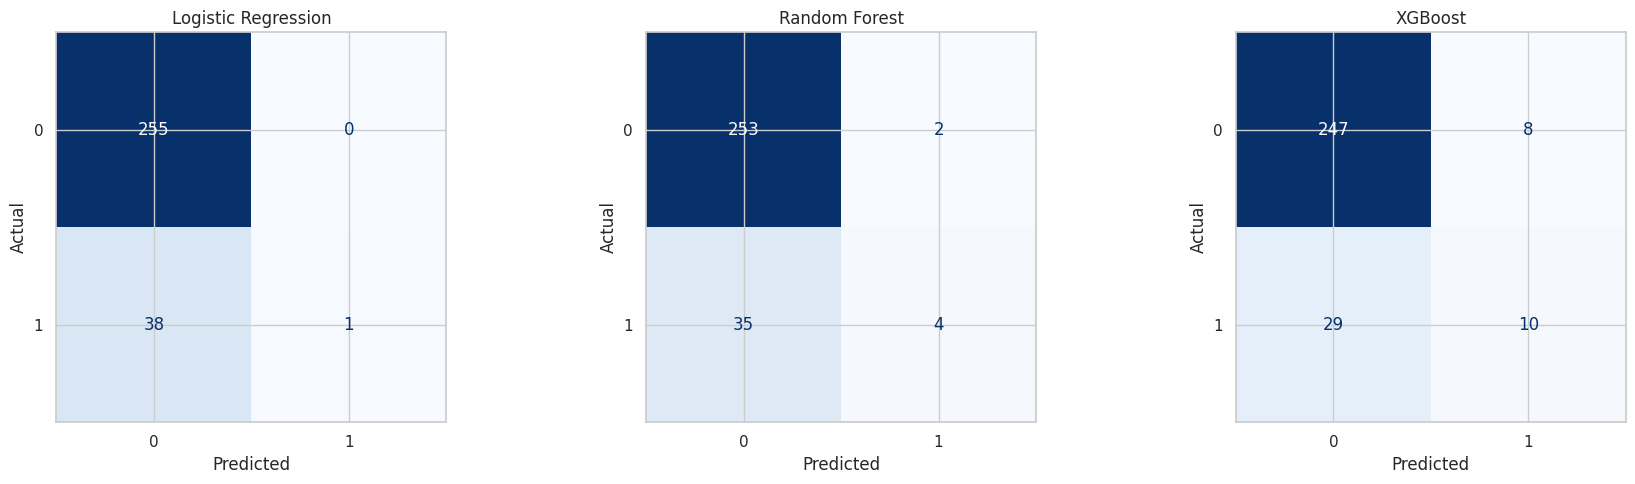

In [ ]:
# ============================================================
#  CONFUSION MATRIX GRAPH
# ============================================================

#Stores model names and their prediction results
models = {
    "Logistic Regression": lr_pred,
    "Random Forest": rf_pred,
    "XGBoost": xgb_pred
}

# Create exact number of axes dynamically
fig, axes = plt.subplots(1, len(models), figsize=(18, 5))

# loop through each model
for ax, (name, preds) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, preds) # Generates confustion matrix using actual vs predicted labels
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap="Blues", values_format='d', colorbar=False)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


 # **Section 6: Hyperparameter Tuning & Model Optimisation (Olamide Olumomi)**

The objective of this stage was to improve the performance of the model as well as its reliability by optimising hyperparameters and addressing class imbalance in the dataset.

##**6.1. Handling Imbalance in dataset: SMOTE (Synthetic Minority Oversampling Technique)**

Synthetic Minority Oversampling Technique (SMOTE) was utilised to oversample the minority class.

In [ ]:
# SMOTE Algorithm for oversampling minority class (Attrition - Employees who left)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [ ]:
# Scaling data - Logistic Regression needs scaled data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression with SMOTE data**

In [ ]:
# Train Logistic Regression model, predict and print the classification report

smote_lr_model = LogisticRegression(max_iter=1000)
smote_lr_model.fit(X_train_scaled, y_res)

smote_lr_pred = smote_lr_model.predict(X_test_scaled)

print(classification_report(y_test, smote_lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.56      0.49      0.52        39

    accuracy                           0.88       294
   macro avg       0.74      0.71      0.73       294
weighted avg       0.87      0.88      0.88       294



**Random Forest with SMOTE data**

In [ ]:
# Train Random Forest model, predict and print the classification report

smote_rf_model = RandomForestClassifier()
smote_rf_model.fit(X_res, y_res)

smote_rf_pred = smote_rf_model.predict(X_test)

print(classification_report(y_test, smote_rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       255
           1       0.59      0.26      0.36        39

    accuracy                           0.88       294
   macro avg       0.74      0.61      0.64       294
weighted avg       0.85      0.88      0.86       294



**XGBoost with SMOTE data**

In [ ]:
# Train Logistic Regression model, predict and print the classification report

smote_xgb_model = XGBClassifier()
smote_xgb_model.fit(X_res, y_res)

smote_xgb_pred = smote_xgb_model.predict(X_test)

print(classification_report(y_test, smote_xgb_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       255
           1       0.50      0.33      0.40        39

    accuracy                           0.87       294
   macro avg       0.70      0.64      0.66       294
weighted avg       0.85      0.87      0.86       294



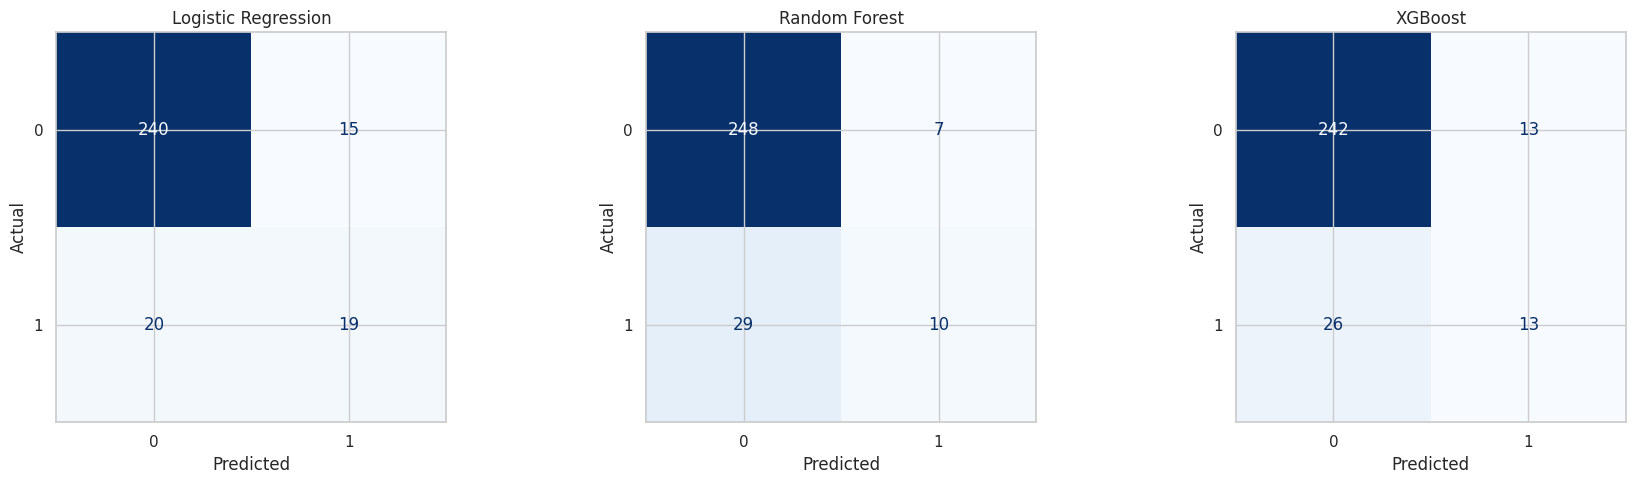

In [ ]:
# Show the confusion matrix of the model predictions after SMOTE data

models = {
    "Logistic Regression": smote_lr_pred,
    "Random Forest": smote_rf_pred,
    "XGBoost": smote_xgb_pred
}

fig, axes = plt.subplots(1, len(models), figsize=(18, 5))

for ax, (name, preds) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap="Blues", values_format='d', colorbar=False)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

Logistic regression saw the greatest increase in recall, moving from 0.03 to 0.49. Random Forest and XGBoost also showed great improvements, getting a recall of 0.33 after the technique.

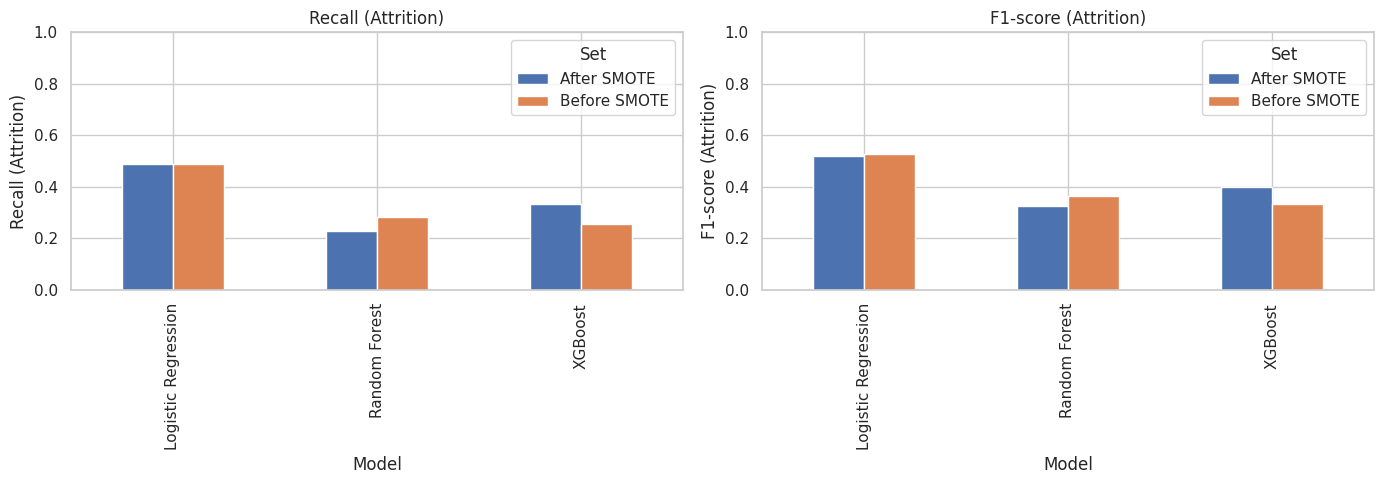

In [ ]:
metrics_to_plot = ["Recall (Attrition)", "F1-score (Attrition)"]

fig, axes = plt.subplots(1, len(metrics_to_plot), figsize=(14,5))

for i, metric in enumerate(metrics_to_plot):
    results_df.pivot(index="Model", columns="Set", values=metric).plot(
        kind="bar", ax=axes[i], title=metric
    )
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0,1)

plt.tight_layout()
plt.show()

##**6.2. Hyper Parameter Tuning: Grid Search**

**Parameters for all models**

In [ ]:
#Defined hyperparameters for models trained

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

**Grid Search for Logistic Regression Model**

In [ ]:
# Grid Search for best hyperparameters for the Logistic Regression model, optimised for the minority class

lr_grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=lr_param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

lr_grid.fit(X_train_scaled, y_res)
print("Best LR Params:", lr_grid.best_params_)

Best LR Params: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


**Grid Search for Random Forest Model**

In [ ]:
# Grid Search for best hyperparameters for the Random Forest model, optimised for the minority class

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

rf_grid.fit(X_res, y_res)
print("Best RF Params:", rf_grid.best_params_)

Best RF Params: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


**Grid Search for XGBoost Model**

In [ ]:
# Grid Search for best hyperparameters for the XGBoost model, optimised for the minority class

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    scoring='recall',
    cv=5,
    verbose=1,
    n_jobs=-1
)

xgb_grid.fit(X_res, y_res)
print("Best XGB Params:", xgb_grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best XGB Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


**Evaluate Model Performances After the Grid Search**

In [ ]:
best_lr = lr_grid.best_estimator_
best_rf = rf_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_

# Predict on test set
grid_lr_pred = best_lr.predict(X_test_scaled)
grid_rf_pred = best_rf.predict(X_test)
grid_xgb_pred = best_xgb.predict(X_test)

In [ ]:
# Print classification reports

print("\nLogistic Regression Report\n")
print(classification_report(y_test, grid_lr_pred))

print("\nRandom Forest Report\n")
print(classification_report(y_test, grid_rf_pred))

print("\nXGBoost Report\n")
print(classification_report(y_test, grid_xgb_pred))


Logistic Regression Report

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.58      0.49      0.53        39

    accuracy                           0.88       294
   macro avg       0.75      0.72      0.73       294
weighted avg       0.88      0.88      0.88       294


Random Forest Report

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.52      0.28      0.37        39

    accuracy                           0.87       294
   macro avg       0.71      0.62      0.65       294
weighted avg       0.85      0.87      0.85       294


XGBoost Report

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       255
           1       0.48      0.26      0.33        39

    accuracy                           0.86       294
   macro avg       0.68      0.61      0.63       294
weigh

The Logistic regression model recall remained at 0.49, showing no improvement.

The Random Forest and XGBoost recall decreased to 0.28 and 0.26, respectively

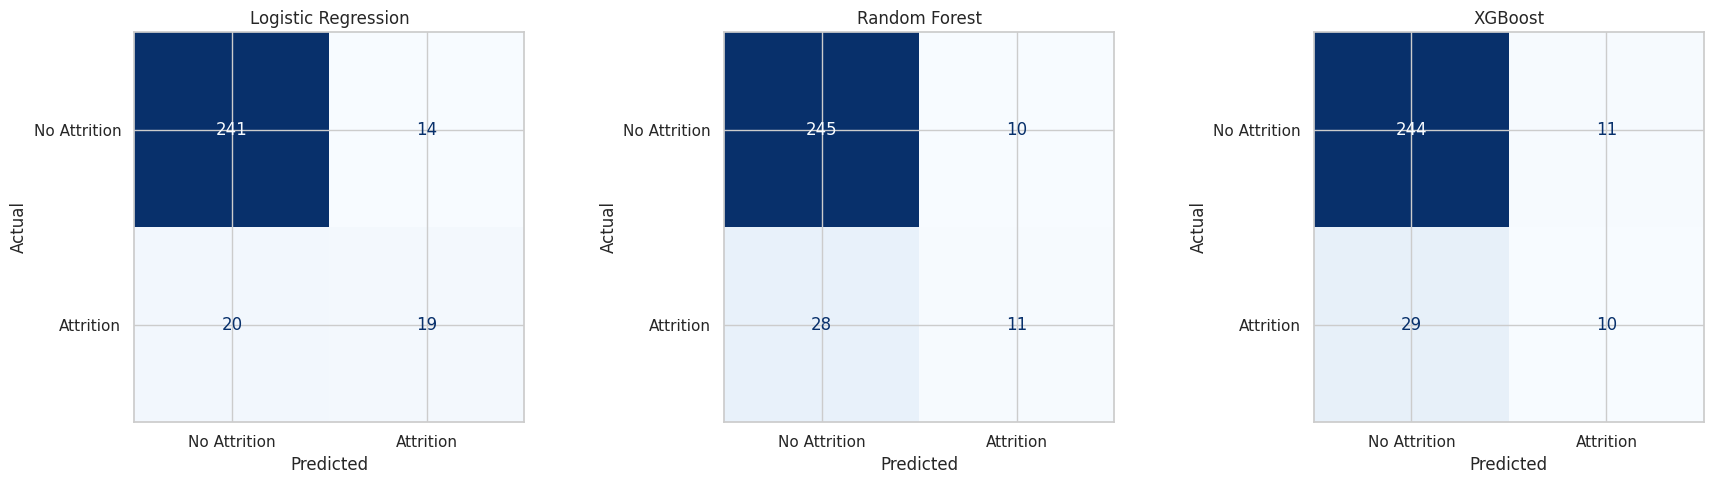

In [ ]:
# Show confusion matrix for the models

models = {
    "Logistic Regression": grid_lr_pred,
    "Random Forest": grid_rf_pred,
    "XGBoost": grid_xgb_pred
}

fig, axes = plt.subplots(1, len(models), figsize=(18, 5))

for ax, (name, preds) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["No Attrition", "Attrition"])
    disp.plot(ax=ax, cmap="Blues", values_format='d', colorbar=False)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

##**6.3. Hyper Parameter Tuning: Treshold**

In [ ]:
# Get the probability of attrition (employee leaving) for each model

lr_probs = best_lr.predict_proba(X_test_scaled)[:,1]
rf_probs = best_rf.predict_proba(X_test)[:,1]
xgb_probs = best_xgb.predict_proba(X_test)[:,1]

In [ ]:
# Function to tune the probabilities, focusing on the f1-score

def tune_threshold(y_true, probs, model_name):
    thresholds = np.arange(0.1, 0.9, 0.05)

    print(f"\n{model_name} Threshold Tuning:\n")

    best_f1 = 0
    best_thresh = 0.5

    for t in thresholds:
        preds = (probs >= t).astype(int)
        f1 = f1_score(y_true, preds)
        recall = recall_score(y_true, preds)

        print(f"Threshold {t:.2f} | F1: {f1:.3f} | Recall: {recall:.3f}")

        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

    print(f"\nBest threshold for {model_name}: {best_thresh} (F1 = {best_f1:.3f})")
    return best_thresh

In [ ]:
# Tuning the probabilities for each model

lr_thresh = tune_threshold(y_test, lr_probs, "Logistic Regression")
rf_thresh = tune_threshold(y_test, rf_probs, "Random Forest")
xgb_thresh = tune_threshold(y_test, xgb_probs, "XGBoost")


Logistic Regression Threshold Tuning:

Threshold 0.10 | F1: 0.316 | Recall: 0.641
Threshold 0.15 | F1: 0.373 | Recall: 0.641
Threshold 0.20 | F1: 0.413 | Recall: 0.641
Threshold 0.25 | F1: 0.444 | Recall: 0.615
Threshold 0.30 | F1: 0.469 | Recall: 0.590
Threshold 0.35 | F1: 0.495 | Recall: 0.590
Threshold 0.40 | F1: 0.518 | Recall: 0.564
Threshold 0.45 | F1: 0.545 | Recall: 0.538
Threshold 0.50 | F1: 0.528 | Recall: 0.487
Threshold 0.55 | F1: 0.537 | Recall: 0.462
Threshold 0.60 | F1: 0.540 | Recall: 0.436
Threshold 0.65 | F1: 0.525 | Recall: 0.410
Threshold 0.70 | F1: 0.415 | Recall: 0.282
Threshold 0.75 | F1: 0.320 | Recall: 0.205
Threshold 0.80 | F1: 0.298 | Recall: 0.179
Threshold 0.85 | F1: 0.182 | Recall: 0.103

Best threshold for Logistic Regression: 0.45000000000000007 (F1 = 0.545)

Random Forest Threshold Tuning:

Threshold 0.10 | F1: 0.249 | Recall: 0.949
Threshold 0.15 | F1: 0.275 | Recall: 0.872
Threshold 0.20 | F1: 0.309 | Recall: 0.769
Threshold 0.25 | F1: 0.348 | Recall

In [ ]:
# Converting probability scores for attrition into final binary predictions

lr_final = (lr_probs >= lr_thresh).astype(int)
rf_final = (rf_probs >= rf_thresh).astype(int)
xgb_final = (xgb_probs >= xgb_thresh).astype(int)

**Evaluate Model Performances After Treshold Tuning**

In [ ]:
# Print classification reports for model performances after threshold tuning

print("\nFinal Logistic Regression Report:")
print(classification_report(y_test, lr_final))

print("\nFinal Random Forest Report:")
print(classification_report(y_test, rf_final))

print("\nFinal XGBoost Report:")
print(classification_report(y_test, xgb_final))


Final Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       255
           1       0.55      0.54      0.55        39

    accuracy                           0.88       294
   macro avg       0.74      0.74      0.74       294
weighted avg       0.88      0.88      0.88       294


Final Random Forest Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       255
           1       0.31      0.51      0.39        39

    accuracy                           0.79       294
   macro avg       0.61      0.67      0.63       294
weighted avg       0.84      0.79      0.81       294


Final XGBoost Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       255
           1       0.39      0.41      0.40        39

    accuracy                           0.84       294
   macro avg       0.65      0.66      0.

The Logistic Regression model recall increased from 49% to 55%. The overall accuracy of the model remained unchanged at 88% which means the increase in performance was targeted towards the minority class.

The Random Forest and XGBoost models were not as impressive as the Logistic Regression model. The random forest model experienced a severe decline in precision and overall accuracy, but a significant increase in recall (from 28% to 51%). The model produced more false positives, which made it highly sensitive but unreliable.

For the XGBoost model, there was a moderate improvement in recall and F1-score.

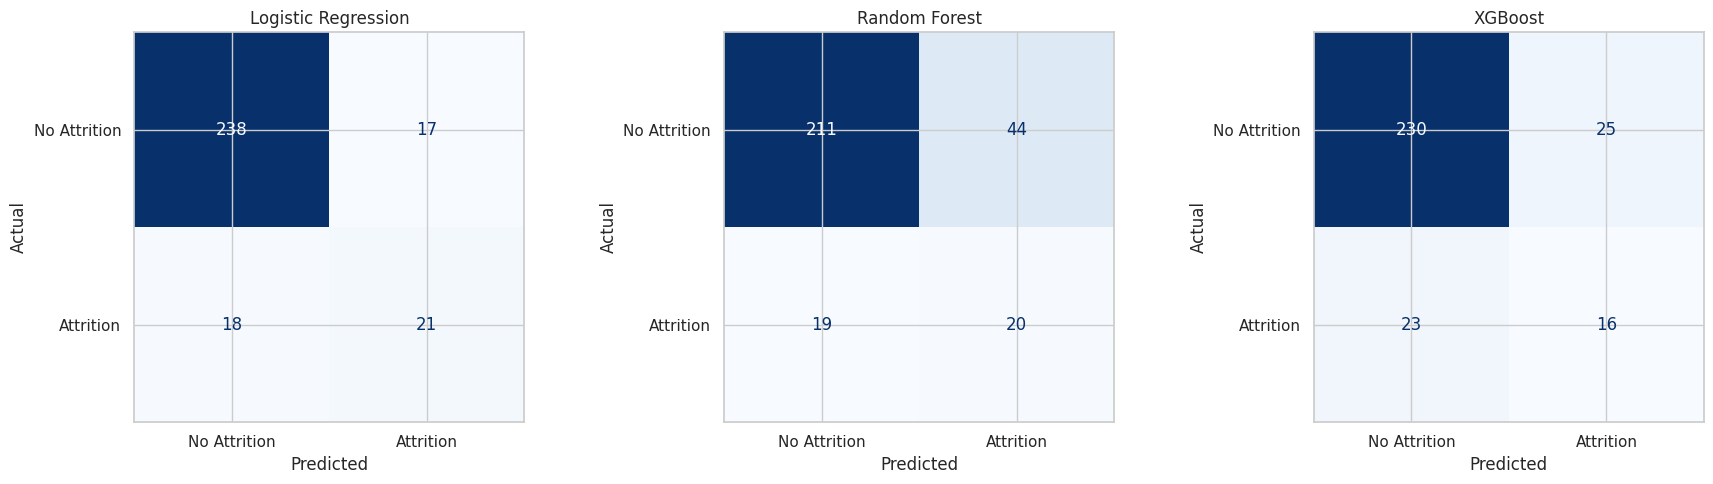

In [ ]:
# Show confusion matrix for model performances after threshold tuning

models = {
    "Logistic Regression": lr_final,
    "Random Forest": rf_final,
    "XGBoost": xgb_final
}

# Create subplots dynamically
fig, axes = plt.subplots(1, len(models), figsize=(18, 5))

for ax, (name, preds) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["No Attrition", "Attrition"]
    )
    disp.plot(ax=ax, cmap="Blues", values_format='d', colorbar=False)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

##**6.4. Model Comparison**

In [ ]:
# Dictionary of model predictions at key stages

sets = {
    "SMOTE Only": {
        "Logistic Regression": smote_lr_pred,
        "Random Forest": smote_rf_pred,
        "XGBoost": smote_xgb_pred
    },
    "Grid+Threshold": {
         "Logistic Regression": lr_final,
          "Random Forest": rf_final,
          "XGBoost": xgb_final
    }
}

sets2 = {
    "Before SMOTE": {
        "Logistic Regression": lr_pred,
        "Random Forest": rf_pred,
        "XGBoost": xgb_pred
    },
    "After SMOTE": {
         "Logistic Regression": smote_lr_pred,
          "Random Forest": smote_rf_pred,
          "XGBoost": smote_xgb_pred
    }
}

sets3 = {
    "Before Grid Search": {
        "Logistic Regression": smote_lr_pred,
        "Random Forest": smote_rf_pred,
        "XGBoost": smote_xgb_pred
    },
    "After Grid Search": {
         "Logistic Regression": grid_lr_pred,
          "Random Forest": grid_rf_pred,
          "XGBoost": grid_xgb_pred
    }
}

In [ ]:
# Tabulating model performances at key stages

rows = []

for set_name, models_dict in sets2.items():
    for model_name, preds in models_dict.items():
        report = classification_report(y_test, preds, output_dict=True)
        rows.append({
            "Set": set_name,
            "Model": model_name,
            "Accuracy": report["accuracy"],
            "Precision (Attrition)": report["1"]["precision"],
            "Recall (Attrition)": report["1"]["recall"],
            "F1-score (Attrition)": report["1"]["f1-score"]
        })

results_df = pd.DataFrame(rows)
results_df

,Set,Model,Accuracy,Precision (Attrition),Recall (Attrition),F1-score (Attrition)
0,Before SMOTE,Logistic Regression,0.870748,1.000000,0.025641,0.050000
1,Before SMOTE,Random Forest,0.874150,0.666667,0.102564,0.177778
2,Before SMOTE,XGBoost,0.874150,0.555556,0.256410,0.350877
3,After SMOTE,Logistic Regression,0.880952,0.558824,0.487179,0.520548
4,After SMOTE,Random Forest,0.877551,0.588235,0.256410,0.357143
5,After SMOTE,XGBoost,0.867347,0.500000,0.333333,0.400000


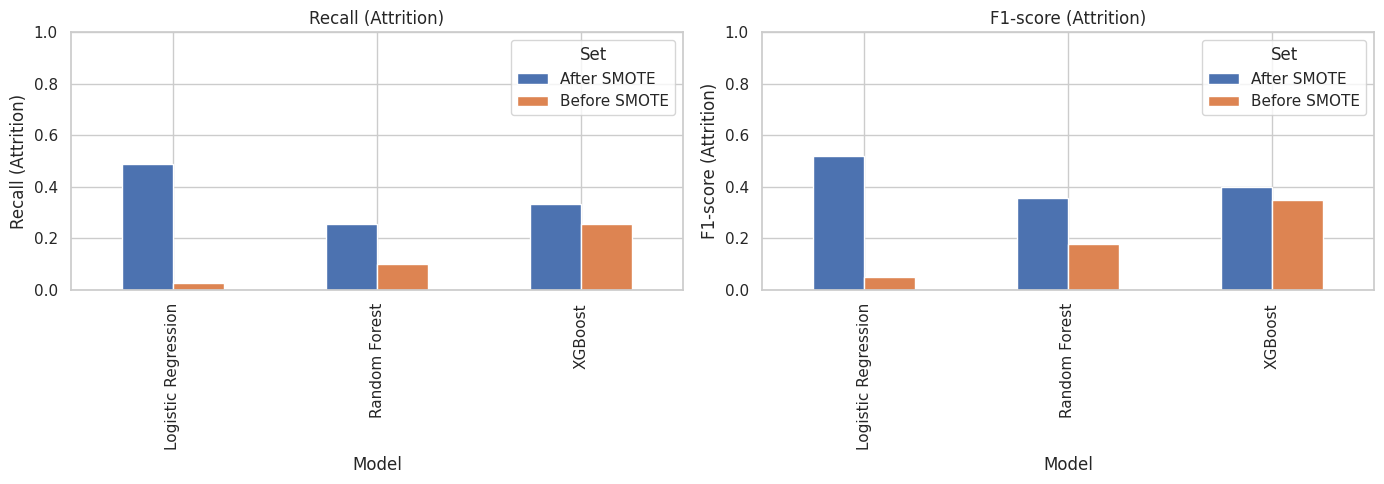

In [ ]:
# Compare Recall and F1-score of models at key stages using bar charts

metrics_to_plot = ["Recall (Attrition)", "F1-score (Attrition)"]

fig, axes = plt.subplots(1, len(metrics_to_plot), figsize=(14,5))

for i, metric in enumerate(metrics_to_plot):
    results_df.pivot(index="Model", columns="Set", values=metric).plot(
        kind="bar", ax=axes[i], title=metric
    )
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0,1)

plt.tight_layout()
plt.show()

Logistic Regression outperforms all others, showing a higher ability to detect attrition cases while maintaining a balance between detection and accuracy.

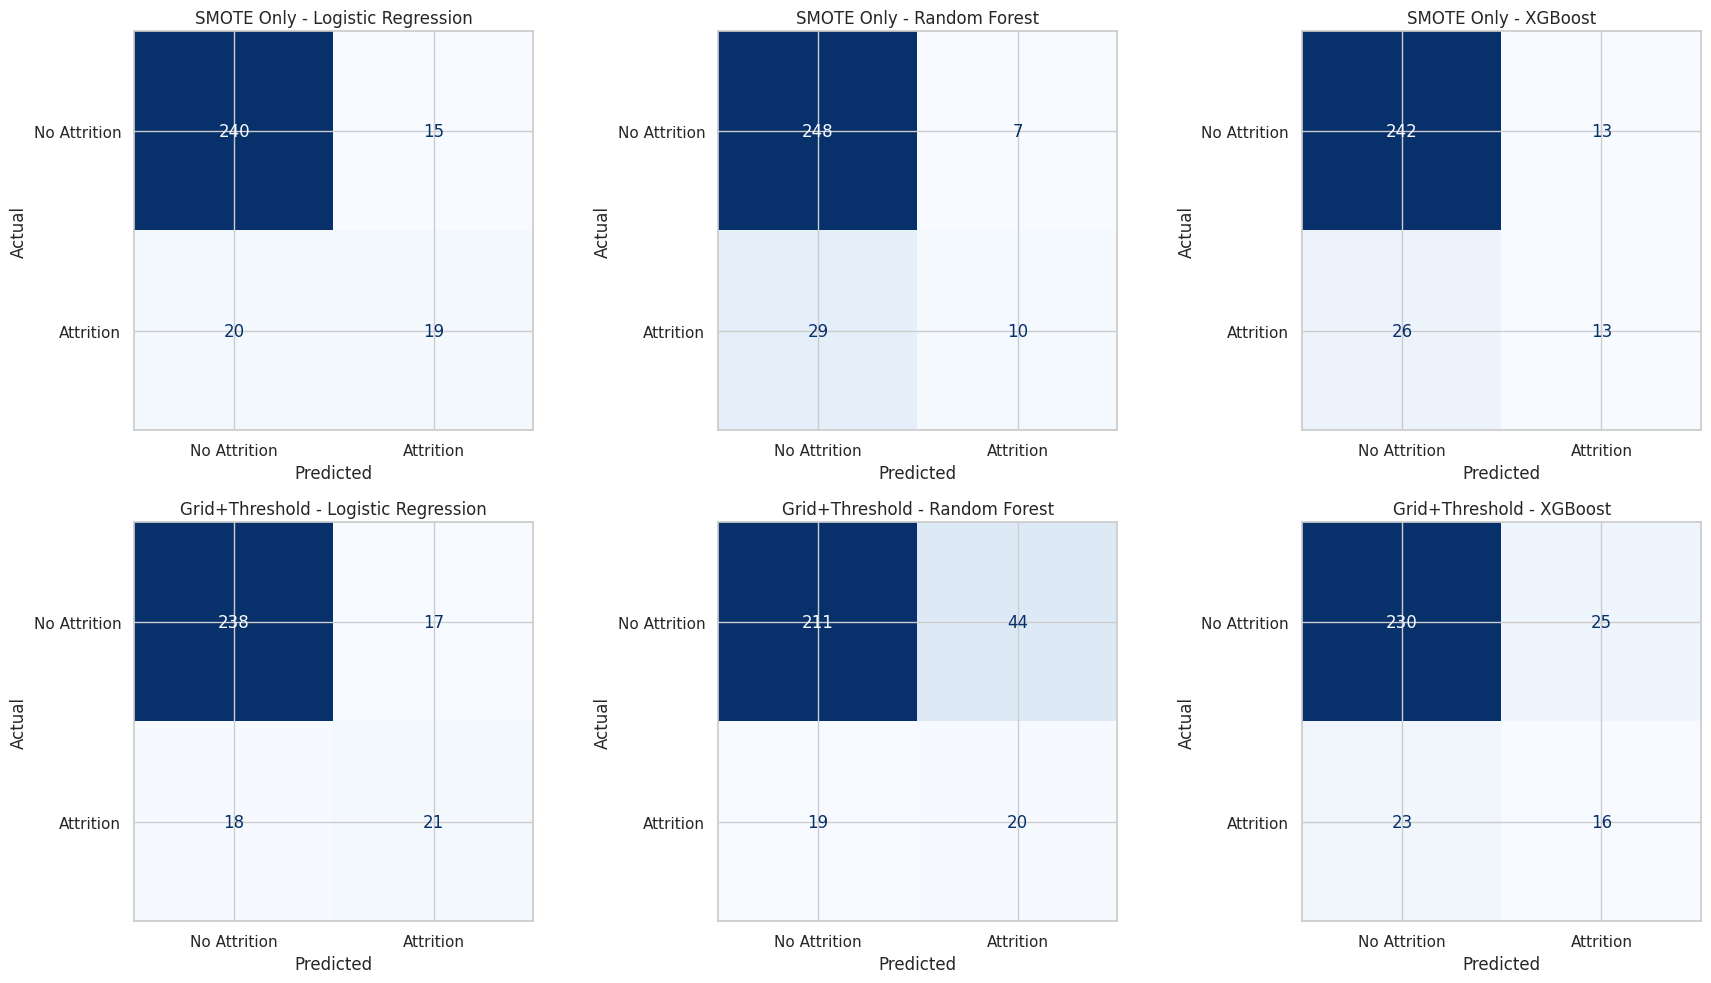

In [ ]:
# Confusion matrix of models at key stages

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows (sets), 3 cols (models)

for i, (set_name, models_dict) in enumerate(sets.items()):
    for j, (model_name, preds) in enumerate(models_dict.items()):
        cm = confusion_matrix(y_test, preds)
        disp = ConfusionMatrixDisplay(cm, display_labels=["No Attrition", "Attrition"])
        disp.plot(ax=axes[i,j], colorbar=False, values_format='d', cmap="Blues")
        axes[i,j].set_title(f"{set_name} - {model_name}")
        axes[i,j].set_xlabel("Predicted")
        axes[i,j].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [ ]:
# Displaying the best performing model

best_row = results_df.loc[results_df["F1-score (Attrition)"].idxmax()]
print("Best Model Overall:\n", best_row)

Best Model Overall:
 Set                              After SMOTE
Model                    Logistic Regression
Accuracy                            0.880952
Precision (Attrition)               0.558824
Recall (Attrition)                  0.487179
F1-score (Attrition)                0.520548
Name: 3, dtype: object


Based on the metrics above, Logistic Regression is the best model.